In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
data= pd.read_excel("adopcion_protectoramalaga.xlsx")

In [3]:
data

,Nombre,Sexo,Raza,Edad,Tamaño,Descripcion,Imagen
0,Banzai,Sexo: Macho,Raza: Cruzado,Edad aproximada: 5 años,Tamaño: Mediano,"Hoy nos toca presentaros a Banzai, tiene un n...",https://www.protectoramalaga.com/imagenes/cata...
1,Freya,Sexo: Hembra,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,📍 SÓLO ADOPCIÓN EN MÁLAGA 📍\n Nombre: Freya\...,https://www.protectoramalaga.com/imagenes/cata...
2,Odin,Sexo: Macho,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,📍 SÓLO ADOPCIÓN EN MÁLAGA 📍\n Nombre: ODIN\nS...,https://www.protectoramalaga.com/imagenes/cata...
3,Rambo,Sexo: Macho,Raza: Mestizo,Edad aproximada: 1 años,Tamaño: Grande,A Rambo lo que mas le gusta es salir al patio...,https://www.protectoramalaga.com/imagenes/cata...
4,Cristal,Sexo: Hembra,Raza: Podenco,Edad aproximada: 1 años,Tamaño: Mediano,NaN,https://www.protectoramalaga.com/imagenes/cata...
...,...,...,...,...,...,...,...
202,Goofy,Sexo: Macho,Raza: Bodeguero,Edad aproximada: 8 años,Tamaño: Mediano,"Este es Goofy, un precioso bodeguero de 7 añi...",https://www.protectoramalaga.com/imagenes/cata...
203,Caitlyn,Sexo: Hembra,Raza: Pastor Belga Malinois,Edad aproximada: 5 años,Tamaño: Mediano,"Si, Caitlyn está en los huesos. A nosotros ta...",https://www.protectoramalaga.com/imagenes/cata...
204,Figo,Sexo: Macho,Raza: Mestizo,Edad aproximada: 3 años,Tamaño: Grande,NaN,https://www.protectoramalaga.com/imagenes/cata...
205,Garfield,Sexo: Macho,Raza: Pastor Alemán X,Edad aproximada: 3 años,Tamaño: Grande,NaN,https://www.protectoramalaga.com/imagenes/cata...


In [4]:
num_nulos = data['Descripcion'].isna().sum()
print(num_nulos)

76


In [5]:
data.dropna(subset=['Descripcion'], inplace=True)

In [6]:
data

,Nombre,Sexo,Raza,Edad,Tamaño,Descripcion,Imagen
0,Banzai,Sexo: Macho,Raza: Cruzado,Edad aproximada: 5 años,Tamaño: Mediano,"Hoy nos toca presentaros a Banzai, tiene un n...",https://www.protectoramalaga.com/imagenes/cata...
1,Freya,Sexo: Hembra,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,📍 SÓLO ADOPCIÓN EN MÁLAGA 📍\n Nombre: Freya\...,https://www.protectoramalaga.com/imagenes/cata...
2,Odin,Sexo: Macho,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,📍 SÓLO ADOPCIÓN EN MÁLAGA 📍\n Nombre: ODIN\nS...,https://www.protectoramalaga.com/imagenes/cata...
3,Rambo,Sexo: Macho,Raza: Mestizo,Edad aproximada: 1 años,Tamaño: Grande,A Rambo lo que mas le gusta es salir al patio...,https://www.protectoramalaga.com/imagenes/cata...
9,Cookie,Sexo: Macho,Raza: Pontier mix,Edad aproximada: 1 años,Tamaño: Mediano,"Cookie es un perrito muy activo, un locuelo l...",https://www.protectoramalaga.com/imagenes/cata...
...,...,...,...,...,...,...,...
192,TRONCO,Sexo: Macho,Raza: Galgo x Podenco,Edad aproximada: 1 años,Tamaño: Grande,TRONCO\n Edad: 14/04/21\nAltura: 65 cm\nLongi...,https://www.protectoramalaga.com/imagenes/cata...
193,ALISA,Sexo: Hembra,Raza: Galgo x Podenco,Edad aproximada: 1 años,Tamaño: Mediano,ALISA\n Edad: 14/04/21\nAltura: 55 cm\nLongit...,https://www.protectoramalaga.com/imagenes/cata...
197,Pipiola,Sexo: Hembra,Raza: Mix de pastor alemán,Edad aproximada: 3 años,Tamaño: Mediano,Mirar a Pipiola es como sentir en tu propio c...,https://www.protectoramalaga.com/imagenes/cata...
202,Goofy,Sexo: Macho,Raza: Bodeguero,Edad aproximada: 8 años,Tamaño: Mediano,"Este es Goofy, un precioso bodeguero de 7 añi...",https://www.protectoramalaga.com/imagenes/cata...


### ANÁLISIS DE SENTIMIENTO DE LA COLUMNA DE DESCRIPCIÓN

In [7]:
# Elimino los saltos de línea
data['Descripcion'] = [re.sub(r'\n', ' ', d) for d in data['Descripcion']]

In [8]:
from textblob import TextBlob

In [9]:
def analisis_sentimiento(texto):
    blob = TextBlob(texto)
    polaridad = blob.sentiment.polarity
    return pd.Series({'Polaridad': polaridad})

In [10]:
resultados = data['Descripcion'].apply(analisis_sentimiento)

In [11]:
data = pd.concat([data, resultados], axis=1)

In [12]:
def clasificar_sentimiento(polaridad):
    if polaridad > 0:
        return 'positivo'
    elif polaridad < 0:
        return 'negativo'
    else:
        return 'seminegativo'

In [13]:
data['clasificacion'] = data['Polaridad'].apply(clasificar_sentimiento)

In [14]:
contador_sentimiento = data['clasificacion'].value_counts()

In [15]:
contador_sentimiento

seminegativo    100
positivo         31
Name: clasificacion, dtype: int64

No hay valores negativos porque no hay textos negativos generalmente, entonces lo que se va a hacer es simplemente tomar los valores neutros como los más extremos rozando el negativo

### PREPROCESAMIENTO DE DATOS

1. Eliminación de puntuación y caracteres especiales:

In [16]:
import re
def procesar_texto(texto):
    texto_procesado = re.sub(r'[^\w\s]','',texto)
    texto_procesado = re.sub(r'\n', ' ', texto_procesado)
    return texto_procesado

In [17]:
data['Descripcion'] = data['Descripcion'].astype(str).apply(procesar_texto)

print(data['Descripcion'])

0       Hoy nos toca presentaros a Banzai tiene un no...
1        SÓLO ADOPCIÓN EN MÁLAGA    Nombre Freya Sexo...
2       SÓLO ADOPCIÓN EN MÁLAGA    Nombre ODIN Sexo M...
3       A Rambo lo que mas le gusta es salir al patio...
9       Cookie es un perrito muy activo un locuelo ll...
                             ...                        
192    TRONCO   Edad 140421 Altura 65 cm Longitud 60 ...
193    ALISA   Edad 140421 Altura 55 cm Longitud 61 c...
197     Mirar a Pipiola es como sentir en tu propio c...
202     Este es Goofy un precioso bodeguero de 7 añit...
203     Si Caitlyn está en los huesos A nosotros tamb...
Name: Descripcion, Length: 131, dtype: object


2. Conversión a minúsculas:

In [18]:
data['Descripcion'] = data['Descripcion'].str.lower()

3. Eliminación de palabras vacías:

In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [20]:
# Definir la lista de palabras vacías para español
nltk.download('stopwords')
nltk.download('punkt')
stopwords_esp = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
data['Descripcion'] = data['Descripcion'].apply(lambda x: ' '.join([token for token in word_tokenize(x) if token.lower() not in stopwords_esp]))

In [22]:
print(data['Descripcion'])

0      hoy toca presentaros banzai nombre tan especia...
1      sólo adopción málaga nombre freya sexo hembra ...
2      sólo adopción málaga nombre odin sexo macho ra...
3      rambo mas gusta salir patio jugar pelota corre...
9      cookie perrito activo locuelo lleno energia di...
                             ...                        
192    tronco edad 140421 altura 65 cm longitud 60 cm...
193    alisa edad 140421 altura 55 cm longitud 61 cm ...
197    mirar pipiola sentir propio cuerpo sufrimiento...
202    goofy precioso bodeguero 7 añitos llegó protec...
203    si caitlyn huesos asombró vimos malinois pesab...
Name: Descripcion, Length: 131, dtype: object


### TOKENIZACIÓN

In [23]:
data['Descripcion'] = data['Descripcion'].apply(lambda x: [token for token in word_tokenize(x)])

In [24]:
data['Descripcion'] = data['Descripcion'].apply(lambda x: ' '.join(x))

In [25]:
print(data['Descripcion'])

0      hoy toca presentaros banzai nombre tan especia...
1      sólo adopción málaga nombre freya sexo hembra ...
2      sólo adopción málaga nombre odin sexo macho ra...
3      rambo mas gusta salir patio jugar pelota corre...
9      cookie perrito activo locuelo lleno energia di...
                             ...                        
192    tronco edad 140421 altura 65 cm longitud 60 cm...
193    alisa edad 140421 altura 55 cm longitud 61 cm ...
197    mirar pipiola sentir propio cuerpo sufrimiento...
202    goofy precioso bodeguero 7 añitos llegó protec...
203    si caitlyn huesos asombró vimos malinois pesab...
Name: Descripcion, Length: 131, dtype: object


 ### IDENTIFICACIÓN DE TEMAS

Técnicas de extracción de palabtas clave: TF-IDF (identificar palabras más relevantes)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
.


In [28]:
print(list(data.columns)) 

['Nombre', 'Sexo', 'Raza', 'Edad', 'Tamaño', 'Descripcion', 'Imagen', 'Polaridad', 'clasificacion', '01012020', '01012022', '010221', '011221', '012022', '020122', '031121', '060222', '070721', '080620', '10', '100', '100121', '100319', '10122022', '11', '111121', '12', '121021', '12122012', '1320', '140421', '15', '150121', '15112022', '16', '160122', '171020', '175', '180', '180º', '195', '1ª', '1º', '20', '200622', '2018', '20kg', '210921', '22', '22022020', '22288', '22307', '22311', '22356', '23', '240221', '241020', '25', '26112022', '270222', '291220', '2ª', '30', '301019', '31', '40', '42', '43', '47', '49', '50', '52', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '67', '68', '70', '72', '73', '74', 'abajo', 'abandona', 'abandonada', 'abandonado', 'abandonados', 'abandonan', 'abandonar', 'abandonarla', 'abandonarlo', 'abandonaron', 'abandonas', 'abandone', 'abandono', 'abarrotada', 'abejita', 'abierto', 'abiertos', 'abra', 'abracemos', 'abrazar', 'abr

Prefiero eliminar las columnas cuya etiqueta sea un número porque no me aportan ningún valor:

In [29]:
data = data.filter(regex='^\D')

In [30]:
print(list(data.columns))

['Nombre', 'Sexo', 'Raza', 'Edad', 'Tamaño', 'Descripcion', 'Imagen', 'Polaridad', 'clasificacion', 'abajo', 'abandona', 'abandonada', 'abandonado', 'abandonados', 'abandonan', 'abandonar', 'abandonarla', 'abandonarlo', 'abandonaron', 'abandonas', 'abandone', 'abandono', 'abarrotada', 'abejita', 'abierto', 'abiertos', 'abra', 'abracemos', 'abrazar', 'abrazos', 'abril', 'abrilhachi', 'abrir', 'abrirlos', 'absolutamente', 'abuelete', 'abuelita', 'abuelitas', 'acaba', 'acabado', 'acaban', 'acabo', 'acariciamos', 'acariciar', 'acariciemos', 'acaricien', 'acaricies', 'accedió', 'acepta', 'aceptaba', 'aceptando', 'acepte', 'acerca', 'acercaba', 'acercamos', 'acercar', 'acercaramos', 'acercarnos', 'acercarse', 'acercarte', 'acercará', 'acercáramos', 'acerque', 'acerques', 'achinan', 'achuchamos', 'achuchemos', 'achuchones', 'acoger', 'acogida', 'acogidas', 'acogidasprotectoramalagacom', 'acogiéndolo', 'acompaña', 'acompañada', 'acompañado', 'acompañan', 'acompañarte', 'acompañe', 'acostumbra'

Voy a crear una lista con los nombres de las columnas pero sin los 8 primeros elementos que son de las columnas que ya tenía antes el df mas la de sentimiento:

In [31]:
columnas= list(data.columns)[9:]

In [32]:
len(columnas)

2899

In [33]:
for i in columnas:
    print(i)

abajo
abandona
abandonada
abandonado
abandonados
abandonan
abandonar
abandonarla
abandonarlo
abandonaron
abandonas
abandone
abandono
abarrotada
abejita
abierto
abiertos
abra
abracemos
abrazar
abrazos
abril
abrilhachi
abrir
abrirlos
absolutamente
abuelete
abuelita
abuelitas
acaba
acabado
acaban
acabo
acariciamos
acariciar
acariciemos
acaricien
acaricies
accedió
acepta
aceptaba
aceptando
acepte
acerca
acercaba
acercamos
acercar
acercaramos
acercarnos
acercarse
acercarte
acercará
acercáramos
acerque
acerques
achinan
achuchamos
achuchemos
achuchones
acoger
acogida
acogidas
acogidasprotectoramalagacom
acogiéndolo
acompaña
acompañada
acompañado
acompañan
acompañarte
acompañe
acostumbra
acostumbrada
acostumbrado
acostumbrados
acostumbrando
acostumbrándose
actitud
activa
activas
actividad
actividades
activo
actualmente
actúa
acuerdo
acumulabamos
acurrucado
adapta
adaptación
adaptar
adaptarse
adaptará
adaptaría
adecuada
adelante
adelgaza
ademas
además
adopcion
adopción
adopta
adoptada
adoptado


### (Intento fallido) AGRUPAR PALABRAS POR SIMILITUD- MODELO

Se ha intentado clasificar la lista de palabras en 10 clusters utilizando K-means y los embeddings (representación numérica de las palabras en un espacio vectorial, cada palabra se representa por un vector de números reales que captura su significado y contexto en el lenguaje natural) de palabras obtenidos con el modelo Word2Vec. 

Pero no ha sido efectivo debido al pequeño número de datos para el entrenamiento del modelo (las agrupaciones no tenían sentido)

In [34]:
import gensim
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

In [35]:
# Preprocesar los textos
columnas_preprocesado = [[columna] for columna in columnas]

# Entrenar un modelo Word2Vec
model = Word2Vec(columnas_preprocesado, min_count=1)

# Obtener embeddings de las palabras
embeddings = model.wv[columnas]

# Agrupar las palabras en clusters utilizando K-means
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(embeddings)

# Analizar los clusters resultantes
for i in range(num_clusters):
    cluster_words = [columnas[j] for j in range(len(columnas)) if clusters[j] == i]
    print(f"Cluster {i}: {cluster_words}")


Cluster 0: ['abandonada', 'abracemos', 'acaba', 'acariciemos', 'acaricies', 'acerque', 'acerques', 'acoger', 'acostumbrado', 'adelante', 'adora', 'adultos', 'afortunadamente', 'agaches', 'agradecido', 'agresiva', 'algélica', 'alrededores', 'altibajos', 'amol', 'andalucía', 'animal', 'animarle', 'ansiedad', 'ansiosa', 'ansiosos', 'anterior', 'apasionadamente', 'apasionado', 'apena', 'apoyado', 'aprender', 'aquellos', 'arropadas', 'arroparme', 'arropes', 'aseguraros', 'avances', 'avanzará', 'aviso', 'ay', 'añitos', 'baileys', 'bebés', 'bellisimo', 'benjamines', 'bien', 'bio', 'biografía', 'brillo', 'brindarle', 'buddy', 'buenas', 'buenisimo', 'busca', 'buscando', 'busque', 'cairo', 'calle', 'calma', 'camión', 'carita', 'cariñoso', 'carácter', 'cascarón', 'casera', 'catalogarlos', 'celebrarla', 'china', 'chocolate', 'cinco', 'claud', 'coche', 'cogiendo', 'cojea', 'comer', 'compi', 'complicación', 'complicarse', 'comporta', 'comportamiento', 'comprobar', 'confiar', 'conmueva', 'conocerlo',

C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


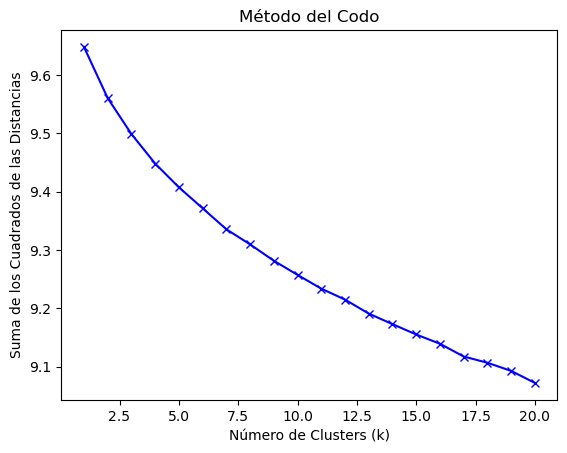

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Crear una lista con los valores de la suma de los cuadrados de las distancias para cada número de clusters
ssd = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    ssd.append(kmeans.inertia_)

# Graficar la curva del método del codo
plt.plot(range(1, 21), ssd, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de los Cuadrados de las Distancias')
plt.title('Método del Codo')
plt.show()


### (Intento final) AGRUPAR PALABRAS POR SIMILITUD- MANUAL

Lista de todas las palabras posibles:

In [37]:
columnas

['abajo',
 'abandona',
 'abandonada',
 'abandonado',
 'abandonados',
 'abandonan',
 'abandonar',
 'abandonarla',
 'abandonarlo',
 'abandonaron',
 'abandonas',
 'abandone',
 'abandono',
 'abarrotada',
 'abejita',
 'abierto',
 'abiertos',
 'abra',
 'abracemos',
 'abrazar',
 'abrazos',
 'abril',
 'abrilhachi',
 'abrir',
 'abrirlos',
 'absolutamente',
 'abuelete',
 'abuelita',
 'abuelitas',
 'acaba',
 'acabado',
 'acaban',
 'acabo',
 'acariciamos',
 'acariciar',
 'acariciemos',
 'acaricien',
 'acaricies',
 'accedió',
 'acepta',
 'aceptaba',
 'aceptando',
 'acepte',
 'acerca',
 'acercaba',
 'acercamos',
 'acercar',
 'acercaramos',
 'acercarnos',
 'acercarse',
 'acercarte',
 'acercará',
 'acercáramos',
 'acerque',
 'acerques',
 'achinan',
 'achuchamos',
 'achuchemos',
 'achuchones',
 'acoger',
 'acogida',
 'acogidas',
 'acogidasprotectoramalagacom',
 'acogiéndolo',
 'acompaña',
 'acompañada',
 'acompañado',
 'acompañan',
 'acompañarte',
 'acompañe',
 'acostumbra',
 'acostumbrada',
 'acostumb

Me quedo solo con trozo del df de las columnas nuevas para hacer modificaciones sobre el:

In [38]:
df= data.loc[:, columnas]

Actúo sobre la lista primero, luego voy añadiendo y eliminando columnas al df (paso final)

##### 1. Elimino las palabras que no me interesan

In [39]:
a= ['abajo', 'abarrotada', 'abejita', 'abierto', 'abiertos', 'abra','abril', 'abrir', 'abrirlos', 'absolutamente',  'acaba', 'acabado', 'acaban', 'acabo', 'accedió', 'acepta', 'aceptaba', 'aceptando', 'acepte', 'achinan','acostumbra', 'acostumbrada', 'acostumbrado', 'acostumbrados', 'acostumbrando', 'acostumbrándose', 'actitud',  'actualmente', 'actúa', 'acuerdo', 'acumulabamos', 'acurrucado', 'adecuada', 'adelante', 'adelgaza', 'ademas', 'además', 'adiestramientocaninolopecan', 'adopcion', 'adopción', 'adopta', 'adoptada', 'adoptado', 'adoptados', 'adoptantes', 'adoptar', 'adoptarlo', 'adoptas', 'adopte', 'adopto', 'adoptándolo', 'adora',  'adquiere', 'adquirir', 'afecta', 'aficiones', 'afirmar', 'afloja', 'afortunadamente', 'agaches', 'agigantados', 'agua', 'aguanta', 'ahi', 'ahogan', 'ahora', 'ahí', 'aire', 'al',  'alcanzar', 'alcanzarla', 'alegrará',  'alemán',  'algo', 'alguien', 'alguna', 'algunas', 'alguno', 'algunos', 'algélica', 'algún', 'alimentadas', 'alisa', 'allá', 'allí', 'alma', 'alrededor', 'alrededores', 'alta',  'altos', 'altura', 'alumna', 'am', 'ama', 'amante', 'amantes', 'amar', 'ambas', 'ambiente', 'ambos', 'american', 'amigo', 'amigos', 'amol', 'amor',  'amándonos', 'analiza', 'anda', 'andalucía', 'andar', 'andares',  'anima', 'animal', 'animales', 'animando', 'animaos', 'animarle', 'ante', 'anterior', 'anteriormente', 'antes',  'antigua', 'antiguo', 'apagarse', 'apareció', 'aparentemente', 'aparte', 'apena', 'apenas', 'aportó', 'apostamos', 'apoyado', 'apoyo', 'aprecia', 'apreciar', 'apretamos', 'aprovecha', 'aprox', 'aproximadamente', 'apta', 'apto', 'apuntan', 'aquella', 'aquellas', 'aquellos', 'aqui', 'aquí', 'arcoiris', 'arnés', 'arrasquemos', 'arrepentirás', 'arriba', 'arropadas', 'arroparme', 'arropes', 'asco', 'aseguramos', 'asegurar', 'aseguraros', 'asi', 'asociacion', 'asoma', 'asombró', 'aspecto', 'aspectos', 'asumimos', 'así', 'atrás', 'aumentar', 'aun', 'aunque',  'autoestima',  'auténtica', 'auténtico', 'avance', 'avances', 'avanza', 'avanzado', 'avanzan', 'avanzando', 'avanzar', 'avanzará',  'averiarse', 'aviso', 'ay', 'azucena', 'azúcar', 'añadir', 'añazos', 'añito', 'añitos', 'año', 'años', 'aún']
b=  ['baba', 'baguira', 'baileys', 'baja', 'bajado', 'bajamos', 'bajar', 'bajarla', 'bajo', 'bambola', 'banzai', 'bar', 'barriga', 'bartolo', 'bastante', 'basura', 'bautizado', 'be', 'benjamines', 'bichos', 'bichón', 'bien', 'bimba', 'bio', 'biografía', 'blanca', 'blandita', 'blanquita', 'bloquea', 'boca', 'bodeguerilla', 'bodeguerillo', 'bodeguerito', 'bodeguero', 'bolilla', 'bolita', 'bolsillos', 'bomboncito', 'bombón',  'brazos', 'brillo', 'brinda', 'brindar', 'brindarle', 'brinde', 'brisa',  'buddy', 'bull', 'bulma', 'busca', 'buscaba', 'buscamos', 'buscando', 'buscar', 'buscarla', 'buscarle', 'buscarlos', 'buscarnos', 'buscas', 'busque', 'básica', 'básicas']
c= ['cabecita', 'cabeza', 'cachorrón', 'cada', 'cae', 'caiga', 'cairo', 'caitlyn', 'calentita', 'calentitas', 'calentito', 'calidad', 'calidez', 'calle', 'calles', 'calor', 'cama', 'camada', 'camadas', 'cambiar', 'cambiarle', 'cambio',  'camiones', 'camita', 'camión', 'campo', 'canción', 'canelita', 'caninos', 'cantidad', 'capaz', 'cara', 'caracteriza', 'característico', 'caras', 'carecía', 'carencia', 'cargo',  'carita', 'cariñito',  'carla', 'carne', 'casa', 'casabermeja', 'casas', 'cascarón', 'casera', 'casi', 'casita', 'caso', 'casos', 'castigarla', 'catalina', 'catalogara', 'catalogarlos', 'causa',  'caído', 'celebrarla', 'cemento', 'centrarnos', 'centro', 'cepillamos', 'cepillar', 'cerca', 'cereza', 'cerrar', 'chapuzones', 'chenil', 'cheniles', 'chica', 'chicos', 'china', 'chincha', 'chinita', 'chinito', 'chip', 'chispa', 'chocapic', 'chocolate', 'chuche', 'chuches', 'cierto', 'cinco', 'circulo',  'claramente', 'claro', 'claros', 'clase', 'clases', 'claud', 'cm', 'co', 'cobijo', 'coche', 'coge', 'cogemos', 'cogerme', 'cogiendo', 'cohete', 'cojea', 'cola', 'colado', 'colita', 'color', 'columna', 'com', 'coma', 'combinación', 'comemos', 'comentado', 'comer', 'comerciar', 'comernos', 'comerse', 'comerselos', 'cometer', 'comida', 'comidita', 'comienza', 'comienzo', 'comiera', 'como', 'comparte', 'compartido', 'compartiendo', 'compartir', 'compartirla', 'compasión', 'compatible', 'compañer', 'compañera', 'compañero', 'compañeros', 'compi', 'compis', 'complemento', 'completamente', 'completar', 'completo', 'complicación', 'complicado', 'complicarse',  'comprenda', 'comprendan', 'comprensión', 'comprobado', 'comprobar', 'comprobarlo', 'comprometa', 'compromete', 'con', 'concentracion', 'conclusión', 'condiciones',  'conforma','congenió', 'conjunta', 'conlleva', 'conmigo', 'conmueva', 'conoce', 'conocemos', 'conocer', 'conocerla', 'conocerlas', 'conocerle', 'conocerlo', 'conocerse', 'conocerte', 'conoces', 'conocidas', 'conocido', 'conocimos', 'conociéndole', 'conocí', 'conozca', 'conozcas', 'conquiste', 'consciente', 'consecuencias', 'conseguido', 'conseguimos', 'consideraban', 'consideramos', 'considerar', 'consideraron', 'consigue', 'consiguiendo', 'constante', 'constantes', 'contactarnos', 'contactaron', 'contacto', 'contagió', 'contar', 'contaros', 'contemos', 'contenedor', 'contenta', 'contento', 'contigo', 'continuo', 'contra', 'contrario', 'control', 'controla', 'controlada', 'controlar', 'controlarse', 'controle', 'contáctanos', 'convencidos', 'convertirse', 'convertirá', 'convierta', 'convierte', 'convirtiendo', 'convirtiéndose', 'cookie', 'coordinación', 'coqueta', 'coral', 'corazones', 'corazón', 'corona', 'correo',  'corta', 'cortado', 'cosa', 'cosas', 'costaba', 'costando', 'cotilla', 'coyote', 'crea', 'crearlo', 'crecer', 'crecimiento', 'cree', 'creedme', 'creemos', 'creen', 'crees', 'creo', 'creéis', 'criado', 'criar', 'croqueta',  'cruza', 'cruzarse', 'cruzas', 'cruzó', 'crías', 'cual', 'cuales', 'cualquier', 'cualquiera', 'cuando', 'cuantas', 'cuanto', 'cuarentena', 'cuatro', 'cuellito', 'cuello', 'cuenta', 'cuentos', 'cuerda', 'cuerpecito', 'cuerpo', 'cuesta', 'cuestión', 'cuida', 'cuidada', 'cuidado', 'cuidados', 'cuidadosa', 'cuidan', 'cuidando', 'cuidar', 'cuidarsela', 'cuide', 'culete', 'cumple', 'cumpleaños', 'cumplir', 'cumplo', 'cuneta', 'cupiese', 'curas', 'curiosa', 'curiosea', 'curiosearlo', 'curiosidad', 'curioso', 'cuál', 'cuánta', 'cuánto', 'cuántos', 'césped', 'cómo', 'cómoda', 'cómodo']
d= ['da', 'dado', 'daimon', 'dame', 'damos', 'dan', 'dana', 'dando', 'dar', 'darle', 'darles', 'darme', 'darse', 'darte', 'darán', 'das', 'daño', 'de', 'deba', 'debemos', 'debería', 'deberías', 'debida', 'debido', 'decenas', 'deciden', 'decidido', 'decidieron', 'decidimos', 'decidió', 'decimos', 'decir', 'deciros', 'decía', 'dedicado', 'dedicarle', 'defectos', 'defectuoso', 'definen', 'definitiva', 'definitivamente', 'definitivo', 'deja', 'dejadez', 'dejado', 'dejamos', 'dejando', 'dejar', 'dejarla', 'dejaron', 'dejará', 'dejen', 'dejo', 'dejándola', 'dejándonos', 'dejó', 'del', 'delante',  'delicia', 'demasiado', 'demos', 'demostrado', 'demostrando', 'demostrarle', 'demostrarte', 'demuestra', 'demuestre', 'demás', 'den', 'dentro', 'dependiendo', 'deplorable', 'deprimirán', 'derretimos', 'derretirse', 'derrite', 'desaparecer', 'desarrollo', 'desbordados', 'descolgada', 'desconcierto',  'desconocemos', 'desconocido', 'describe', 'descubierto', 'descubriendo', 'descubrimos', 'descubrir', 'desde', 'desea', 'deseado', 'deseamos', 'deseando', 'desear', 'deseo', 'deseosa', 'deseoso', 'desesperadamente', 'desfogar', 'desgracia', 'desgraciadamente', 'deshacemos', 'deshacerme', 'deshacerse', 'deshiciera', 'deshicieron', 'desolación', 'despacio', 'despega',  'desprende', 'después', 'detrás', 'devolverle', 'devolverme', 'devolverá', 'devuelto', 'devuelva', 'dia',  'diablo',  'diaria', 'diariamente', 'diario', 'diarios', 'dias', 'dicen', 'dices', 'dicho', 'diciendo', 'diera', 'dieron', 'diese', 'diez', 'diferentes', 'dificulte', 'difícil', 'difíciles', 'digamos', 'digan', 'digna', 'dinero', 'dingo', 'dio', 'dionisio', 'dios', 'diosa', 'direcciones', 'dirección', 'directamente', 'directrices', 'disfruta', 'disfrutando', 'disfrutar', 'disfrutarla', 'disfrutaría', 'disfrutarían', 'disfrutase', 'disfruten', 'disfruto', 'disfrutona', 'dispuest', 'dispuesta', 'dispuesto', 'dispuestos',  'distingue', 'distintas', 'diversas',  'dogo',  'dominantes', 'donde',  'dos', 'draco', 'dragones', 'duby', 'duda', 'dudamos', 'dudarlo', 'dudará', 'dudes',  'duelo', 'dueña', 'dueño', 'dueños',  'durante',  'dush', 'dándonos', 'dándote', 'dé', 'día', 'días','dólar'] 
e= ['echa', 'echando', 'echarle', 'echarse', 'echarte', 'echen', 'echándolo', 'eda', 'edad', 'edades', 'ee', 'eh', 'ejemplar', 'ejemplo', 'ejercicio', 'el', 'elegía', 'ell', 'ella', 'ellas', 'ello', 'ellos', 'embarazada', 'embarazo', 'embargo', 'emocionalmente', 'emocionamos', 'emociones', 'empezamos', 'empezando', 'empezar', 'empezó', 'empeña', 'empeño', 'empiece', 'empieza', 'en', 'enamorada', 'enamorado', 'enamorados', 'enamoradísimos', 'enamorar', 'enamoraros', 'enamorarte', 'enamorará', 'enamoraréis', 'enamoraría', 'enamore', 'enamoró', 'encajar', 'encanta', 'encantadas', 'encantan', 'encantaría', 'encante', 'encargaron', 'encargue', 'encerrada', 'encerrado', 'encima', 'encoge', 'encogido', 'encoja', 'encontrada', 'encontradas', 'encontrado', 'encontramos', 'encontrar', 'encontraron', 'encontrará', 'encontrase', 'encontró', 'encuentra', 'encuentran', 'encuentre', 'encuentro','engancharte', 'enomorarnos', 'enormes', 'enseguida',  'ensikaiecmiomare', 'entendemos',  'entendido', 'enteramente', 'entonces', 'entra', 'entramos', 'entras', 'entrañable', 'entre', 'entregada', 'entregado', 'entregar', 'entregarlo', 'entro', 'entró', 'entusiasmo', 'envíanos', 'equilibrada', 'equilibrado', 'equilibrio', 'era', 'eran', 'eres', 'eros', 'error', 'es', 'esa', 'esas', 'escapar',  'escreibe', 'escribe', 'escribenos', 'escribir', 'escribirnos', 'escríbenos', 'escucha', 'ese', 'esn', 'eso', 'esos', 'espacio', 'espacios', 'espaldas', 'españa', 'especial', 'especiales', 'especificando', 'espera', 'esperaba', 'esperamos', 'esperando', 'esperanza', 'esperar', 'espero', 'esperándote', 'esponjosidad',  'esquina', 'esta', 'estaba', 'establezca', 'estado', 'estamos', 'estan', 'estar', 'estará', 'estas', 'estatua', 'este', 'estemos', 'estereotipia', 'estereotipias', 'estimulos', 'estira', 'esto', 'estorbabas', 'estorbo', 'estos', 'estoy', 'estrujable', 'estupendamente', 'estuviese', 'estuvo', 'está', 'estáis', 'están', 'estás', 'esté', 'estén', 'estímulos', 'etapa', 'etc', 'eternamente', 'evitando', 'evitar', 'exacta', 'excepcional', 'excepto',  'excursión', 'excusas', 'existe', 'existencia', 'experiencia', 'experiencias', 'experimentado', 'experimente', 'explicarnos', 'explorar', 'exprimiendo', 'exterior', 'extirparlos', 'extra', 'extraordinario', 'extraños', 'extremadamente', 'extremo'] 
f= ['facil', 'facilidad', 'facilitarle', 'facilitarnos', 'fallece', 'fallecido', 'falleció', 'falta', 'faltado', 'falte', 'familia', 'familias', 'fani', 'fantástico', 'fascinada', 'favor', 'favorita', 'feature',  'felicitación', 'felicitaramos', 'feliciten',  'fenomenal', 'feo', 'feos', 'fijarse', 'fijará', 'fijase', 'fije', 'fin', 'final', 'finalmente', 'finca', 'firmeza', 'flor', 'flora', 'florecer', 'forma', 'formar', 'forme', 'formulario', 'fortuna', 'fotos', 'fox', 'fresa', 'fresca', 'freya', 'frodo', 'fruto',  'fría', 'frío', 'fue', 'fuera', 'fueran', 'fueron',  'fuese', 'futura', 'futuro', 'fábula', 'fácil', 'física', 'físicamente', 'físicas'] 
gh= ['galgo', 'galgos', 'galguito', 'ganan', 'ganando', 'ganas', 'ganó', 'genial', 'gente', 'geriatrico', 'gestionar', 'gesto', 'gestos',  'gillia', 'giro', 'glaciar', 'golliat', 'goofy', 'gordota', 'gotas', 'gozada', 'gracias', 'graciosa', 'graciosas', 'graciosillo', 'gracioso', 'graciosísimo', 'gratamente', 'gratis', 'grisom', 'grupal', 'grupales', 'grupo', 'guarda', 'guardan', 'guardar',  'gus', 'gusta', 'gustan', 'gustar', 'gustaría', 'guste', 'gusto', 'guía', 'guíe', 'géneros', 'ha', 'haber', 'haberla', 'haberlo', 'habiendo', 'hables', 'habrá', 'habría', 'habéis', 'había', 'habían', 'hace', 'hacemos', 'hacen', 'hacer', 'hacerle', 'hacernos', 'hacerse', 'hachi', 'hacia', 'hacian', 'haciendo', 'hacinada', 'haciéndole', 'haciéndose', 'hacía', 'haga', 'hagamos', 'hagan', 'han', 'happy', 'hartos', 'has', 'hasta', 'hay', 'haya', 'hayan', 'hayas', 'he', 'heces', 'hecho',  'hemos',  'hermana', 'hermanita', 'hermano', 'hermanos',  'hiciese', 'hierba', 'hija', 'hinchada', 'historia', 'hizo', 'hl', 'hociquillo', 'hogar', 'hola', 'hora', 'horas',  'hoy', 'hoyo', 'https', 'hubiese', 'hueco', 'huesos',  'humana', 'humano', 'humanos', 'hércules']
ij= ['ibas', 'idea', 'ideal', 'ido', 'ies', 'ignora', 'ignorando', 'igual', 'ikea', 'ilegal', 'ilusión', 'imaginad', 'imaginamos', 'imaginarla', 'imaginarlo', 'imaginarnos', 'imaginaros', 'imagínate',  'impedia', 'impedimentos', 'impensable', 'imperdonable', 'importa', 'importaba', 'importante', 'importar', 'importara', 'imposible', 'imposibles', 'imprescindible', 'incluso', 'incluyera', 'incompresible', 'incondicional', 'inconveniente', 'incrementa', 'increíble', 'increíblemente',  'independientemente', 'indeseada', 'indeseado',  'infinitamente', 'infinitas', 'información', 'ingrit', 'inicio', 'inimaginablemente', 'injusta', 'inmediatamente', 'inmensa', 'inmensas', 'innumerables', 'inquietan',  'instagram', 'instante', 'instantáneamente', 'instinto', 'integral',  'intemperie', 'intenciones', 'intención',  'intensos', 'intenta', 'intentamos', 'intentan', 'intentando',  'interesa', 'interesada', 'interesado', 'interesase', 'interminables', 'intimidado',  'inundan', 'investigar', 'invierno', 'invisible', 'ir', 'iremos', 'irme', 'irnos', 'irresponsabilidad', 'irrompible', 'jack', 'jamás', 'jara',  'jim', 'jordan', 'joven', 'jovencito', 'jovialidad', 'joya', 'juntas', 'junto', 'juntos', 'juventud', 'jóvenes'] 
kl= ['karen', 'karly', 'kg', 'kiles', 'kilos', 'kimbo', 'kinú', 'kira', 'la', 'ladito', 'lado', 'lados',  'lanzar', 'larga', 'largas', 'largo', 'largos', 'las', 'le',  'leire', 'lejos', 'lentamente', 'lento', 'lentos', 'les', 'levanta', 'levantaba', 'ley', 'león', 'libertad',  'link', 'linktr',  'listo', 'llama', 'llamada', 'llamado', 'llaman', 'llamando', 'llamar', 'llamarlo', 'llamas', 'llamo', 'llega', 'llegada', 'llegado', 'llegamos', 'llegan', 'llegar', 'llego', 'llegue', 'llegué', 'llegó', 'llena', 'llenando', 'llenar', 'llenarla', 'llenarlo', 'llenarte', 'llenas', 'llene', 'lleno', 'lleva', 'llevaba', 'llevadas', 'llevamos', 'llevan', 'llevando', 'llevar', 'llevarla', 'llevarme', 'llevará', 'lleve', 'llevo', 'llevó', 'llovía', 'lluvia', 'lluvias', 'lluvía', 'lo', 'lograba', 'lograr', 'logrará', 'lola', 'longitud', 'los', 'lucas', 'luces',  'lucrarse', 'lucro', 'lucy', 'lucía', 'luego', 'lugar', 'lugares', 'lula', 'luz',  'límites', 'lógicamente']
m=  ['macarrón', 'macedonia','madre', 'madrinas', 'maestros', 'magia', 'mail', 'mal', 'mala', 'malas', 'maleza', 'mali', 'malia', 'malinois', 'malinterpretéis',  'malo', 'malos',  'maltés', 'mama', 'mamas', 'mami', 'mamiperras', 'manada', 'mandíbula', 'mandón', 'manejable', 'manejarlo', 'manera', 'maneras', 'manipulable', 'manipular', 'mano', 'manolita', 'manos', 'manosear', 'manoseen',  'manta', 'mantienen', 'maravilla', 'maravillada', 'marcarle', 'marcarles', 'margarita', 'marquesa', 'marrón', 'mas', 'mascota', 'mastina', 'mastines', 'mastitis', 'mastín', 'maximo', 'maya', 'mayor', 'me', 'media', 'mediana', 'medianito', 'mediano',  'medida', 'medio', 'medirsela', 'mejor', 'mejora', 'mejorado', 'mejorando', 'mejorar', 'melón', 'menos', 'mentales', 'mentalmente', 'menudito', 'menudo', 'meras', 'merece', 'merecedor', 'merecen', 'mereces', 'merecieran', 'merecía', 'merezco', 'mero', 'mes', 'meses', 'mete', 'metida', 'metiendo', 'mezcla', 'mezclado', 'mi', 'microchip', 'midamos', 'miedo', 'miedos', 'miedoso', 'miedosos', 'miel', 'miembro', 'miembros', 'mientras', 'mikado', 'mil', 'minguito', 'minuto', 'minutos', 'mira', 'miraba', 'mirad', 'mirada', 'mirando', 'mirar', 'mirarla', 'mirarnos', 'mirándole', 'mirándonos', 'mis', 'misma', 'mismas', 'mismo', 'mismos', 'mismísimo', 'mitad', 'mix',  'moduloa', 'modulob', 'moduloc', 'modulot', 'mojaba', 'mojado', 'moldeable', 'momento', 'momentos', 'montón', 'mora', 'mordedores', 'morimos', 'moro', 'moríamos', 'mostraba', 'mostrado', 'mostrando', 'mostrar', 'mostrarnos', 'mostrarse', 'mostrará', 'motivo',  'mucha', 'muchas', 'muchisimo', 'mucho', 'muchos', 'muchísima', 'muchísimas', 'muchísimo', 'muchísimos', 'mueble', 'muere', 'muerta', 'muertas', 'muerto', 'muestra', 'muestre', 'mujer', 'mullida', 'multitud', 'mundo', 'muros', 'muucho', 'muuuuchísimo', 'muuuuuy', 'muuuuy', 'muuuy', 'muy', 'mzxzrqjyixg', 'mágico', 'málaga', 'mándanos', 'máquina', 'más', 'máximo', 'mí', 'mía', 'módulo'] 
no= ['nació', 'nada', 'nadie', 'nala', 'nariz', 'navidad', 'navidades', 'necesaria', 'necesarias', 'necesario', 'necesidades', 'necesita', 'necesitaba', 'necesitamos', 'necesitará', 'necesitaría', 'necesitas', 'necesiten', 'necesito', 'negaba', 'negativo', 'negrita', 'negrito', 'negro', 'nemo', 'nena',  'ni', 'nicole', 'nina', 'ningun', 'ninguna', 'ninguno', 'ningún', 'nivel', 'niveles',  'no', 'noches', 'nombre', 'normal', 'normalmente', 'nos', 'nosotras', 'nosotros', 'nota', 'notaba', 'notablemente', 'notamos', 'nudos', 'nuestra', 'nuestras', 'nuestro', 'nuestros', 'nueva', 'nuevas', 'nuevo', 'nuevos', 'nunca', 'número',  'objeto', 'observa', 'observarlo', 'obstante', 'obstáculos', 'ocho', 'ocurra', 'ocurre', 'ocurrido', 'ocurriese', 'odin', 'odín', 'ofrecemos', 'ofrecen', 'ofrecerle', 'ofrezca', 'ojalá', 'ojitos', 'ojos', 'oler', 'olerle', 'olerlos', 'olfatear', 'olisqueando', 'olisquear', 'olisquearlo', 'olvida', 'olvidar', 'olvido',  'oportunidad', 'orden', 'orejas', 'orejitas', 'orina', 'os', 'oso', 'otra', 'otras', 'otro', 'otros'] 
p= ['pachona', 'padre', 'padres', 'padrinos', 'pagan', 'pagando', 'pagar', 'palabra', 'palabras', 'palo', 'paloma', 'palos', 'panza', 'paquita', 'par', 'para', 'parada', 'parar', 'parará', 'parece', 'parecer', 'parecería', 'pareció', 'parecía', 'paredes', 'pareja', 'parezca', 'pariendo', 'parir', 'parió', 'parque', 'parta', 'parte', 'partió', 'partía', 'parvo', 'pasa', 'pasaba', 'pasada', 'pasado', 'pasados', 'pasan', 'pasando', 'pasar', 'pasara', 'pasarle', 'pasarse', 'pasaría', 'pasas', 'pasatiempo', 'pase', 'pasión', 'pasos', 'pastor', 'pastorcilla', 'pata', 'patas', 'patio', 'patita', 'patitas', 'paula', 'pautas', 'payasete', 'payasos', 'paz', 'peculiar', 'peculiares', 'pedimos', 'pedir', 'pedirte',  'pegadito', 'pegar', 'pegarse', 'peinemos',  'peli',  'pelota', 'pelotas',  'pendientes', 'pensamos', 'pensando', 'pensar', 'pensarán', 'pensaría', 'peor', 'pequita', 'percibes', 'perfección', 'perfecta', 'perfectamente', 'perfecto', 'permita', 'permite', 'permitirse', 'pero',  'perrera', 'perrialfombra', 'perrificada', 'perrillo',  'perruna', 'perruno', 'perrunos', 'perseguirse', 'persigue', 'persiguiendo', 'persona', 'personalidad', 'personas', 'pesa', 'pesaba', 'pesado', 'pesar', 'peso', 'petunia', 'pico', 'pide', 'pides', 'pidiendo', 'pidiéndonos', 'piel', 'piensas', 'pienses', 'pienso', 'pierda', 'pies', 'pilla', 'pintado', 'pipi', 'pipiola', 'pipper', 'pipí', 'pisar', 'piscina', 'pitu', 'pitín', 'plan', 'plantas', 'plato',  'pleno', 'pobre', 'poco', 'pocos', 'podamos', 'podemos', 'podenca', 'podenco', 'podencos', 'podenquita', 'podenquito', 'poder', 'podido', 'podrá', 'podría', 'podríamos', 'podrías', 'podéis', 'podía', 'podíamos', 'polígono', 'pomelo', 'pone', 'ponemos', 'poner', 'ponerle', 'ponernos', 'ponerse', 'ponerte', 'pongamos', 'pongo', 'ponía', 'popular', 'poquito', 'poquitín', 'por', 'porfi', 'porque', 'porqué', 'porta', 'portado', 'pose', 'posee',  'posible', 'posiblemente', 'positivismo', 'positivo', 'poste', 'potencial', 'pozo', 'practicar', 'pre', 'preciosa',  'prefiere', 'pregunta', 'preguntado', 'preguntando', 'preguntar', 'preguntarnos', 'premio', 'preocupación', 'preocupado', 'preocupan', 'preocupara', 'preocuparse', 'preocupes', 'preparada', 'preparado', 'preparaos', 'preparar', 'presencia', 'presenta', 'presentación', 'presentamos', 'presentar', 'presentarme', 'presentaros', 'presentarse', 'presente', 'pretendía', 'primer', 'primera', 'primeras', 'primerizas', 'primeros', 'principio', 'priscila', 'prisionera', 'privada', 'probablemente', 'probada', 'probado', 'probamos', 'probarlo', 'problema', 'problemas', 'procese', 'proceso', 'producto', 'profunda', 'progresar', 'prometedor', 'prometo', 'pronto', 'propia', 'propias', 'propietario', 'propio', 'proporcional', 'prote', 'protectora', 'protectoramalaga', 'proteja', 'provocaba', 'provocado', 'provocando', 'pruebas', 'prácticamente', 'próxima', 'próximamente', 'psicológicamente', 'publicarlo', 'pudiera', 'pudieran', 'pudieron', 'pudimos', 'pudo', 'pueda', 'puedan', 'puede', 'pueden', 'puedes', 'puedo', 'puerta', 'pues', 'puesta', 'puesto', 'pumba', 'punto', 'puntos', 'pura', 'puro', 'pusieron', 'pusiéramos', 'pájaro'] 
qr= ['que', 'queda', 'quedaba', 'quedado', 'quedan', 'quedar', 'quedarse', 'quede', 'quedó', 'quemadas', 'queramos', 'queremos', 'querer', 'quererte', 'querida', 'querido', 'queridos', 'queriendo', 'queréis', 'quería', 'quien', 'quienes', 'quiera', 'quieran', 'quiere', 'quieren', 'quieres', 'quiero',  'quiso', 'quitado', 'quitan', 'quizá', 'quizás', 'quién', 'quiénes', 'qué', 'qx3oexpfvem', 'rabito', 'rabo', 'ración', 'radical', 'rafa', 'rafita', 'rait', 'rambo',  'raro', 'rascarme', 'rasgos', 'rasque', 'rasquemos', 'rasquen', 'rasques', 'rastas', 'rastro', 'ratito', 'ratitos', 'rato', 'ratos', 'rayito', 'rayo', 'raza', 'razas', 'razón', 'raíz', 'reaccionaba', 'reacción', 'realidad', 'realmente', 'rebeca', 'rechazaba', 'rechistar', 'reciba', 'recibe', 'recibido', 'recibiendo', 'recibiendonos', 'recibimos', 'recibir', 'recibirnos', 'recompensará', 'recordarlas', 'recordáis', 'recuerdos', 'reducido', 'referencia', 'referente', 'reflejaba', 'reflejado', 'refugia', 'refugio', 'regalado', 'regalo', 'regañinas', 'regordeta',  'rejas',  'rellena', 'remediar', 'renacido', 'rencor', 'rencores', 'rendido', 'rendirnos', 'renunció', 'repartiendo', 'repente', 'repite', 'repleta',  'representa', 'repugnante', 'requiere', 'rescatado', 'rescatados', 'rescatamos', 'rescatarlas', 'residas', 'residentes', 'resistirte', 'respecto', 'respeten', 'respetuosa', 'responde', 'responderemos', 'responsabilidades', 'respuesta', 'respuestas', 'resto', 'resultados', 'resultar', 'resultó', 'resumen', 'reímos', 'rica', 'risueña', 'risueňo', 'robado', 'robin', 'roces', 'rocky', 'roco', 'rodeado', 'rompería', 'ronda', 'rosmery', 'rostro', 'rota', 'roto', 'rotos', 'rubio', 'rudolf', 'rumbo', 'runner', 'ruta', 'rutas', 'ruth', 'rutinas', 'rápidamente', 'rápido'] 
resto= ['sabe', 'sabemos', 'saben', 'saber', 'saberlo', 'sabes', 'sabido', 'sabremos', 'sabrosas', 'sabéis', 'sabíamos', 'saca', 'sacamos', 'sacan', 'sacando', 'sacar', 'sacas', 'sagrados', 'salchicha', 'salchichas', 'sale', 'salerosa', 'salga', 'salgo',  'salido',  'salió', 'saltando', 'saltar', 'saltitos', 'saltos',  'saluda', 'saludar', 'saludarla', 'saludarnos', 'salvaje', 'salvan', 'salven', 'salvo', 'salío', 'sam',  'saque', 'saquemos', 'sarita', 'se', 'sea', 'sean', 'seguida', 'seguir', 'segunda', 'segundo', 'segundos', 'segura', 'seguramente',  'según', 'semanas',  'sentando', 'sentarse', 'sentido', 'sentidos', 'sentimientos', 'sentir', 'sentirse', 'sentía', 'sepa', 'separa', 'separamos', 'separar', 'separarlas', 'separarse', 'ser', 'sera', 'seres', 'serlo', 'será', 'serán', 'serás', 'sería', 'serías', 'sesiones', 'sesión', 'severo', 'sexo', 'sexos', 'share', 'shorts', 'si', 'sido', 'siempre', 'siendo', 'sienta', 'sientas', 'siente', 'siesta', 'sigan', 'significa', 'signos', 'sigue', 'siguen', 'sigues', 'siguiese',  'simple', 'simplemente',  'sin', 'sinceramente', 'sino', 'sintiera', 'sintiéndose', 'siquiera', 'sirve', 'sitio', 'sitios', 'situacion', 'situación', 'slinky', 'sobre', 'sobreexcitarse', 'sobretodo', 'sobrevivir', 'socorro', 'sofi', 'sofá', 'sol', 'sola', 'solamente', 'solas', 'soldaron', 'solecito', 'solita', 'solo', 'soltando', 'soltandonos', 'soltarte', 'sombra', 'sometida', 'somos', 'son', 'sonará', 'sonic',  'soplo', 'soportando', 'soy', 'standard', 'stanford', 'su', 'suavidad', 'subirse', 'sucediera', 'suelen', 'suelo', 'suelta', 'suelto', 'suene', 'suerte', 'suficiente',  'sujeta', 'sumido',  'super', 'supera', 'superación',  'superficie', 'superperro', 'supervisión', 'supiera', 'supimos', 'supone', 'suponemos', 'supongo', 'suponía', 'surgir', 'sus', 'suuuuper', 'sé', 'sí', 'sólo', 'súper', 'tamaño', 'tamaños', 'también', 'tampoco', 'tan', 'tanta', 'tanto', 'tantos', 'tantísimo', 'tapeo', 'taras', 'tardará', 'tardes', 'te', 'tele', 'tema',   'temprana', 'tendria', 'tendrá', 'tendrán', 'tendrías', 'tenemos', 'tener', 'tenerlo', 'tenga', 'tengan', 'tengo', 'tenia', 'tenido', 'teniendo', 'teniéndola',  'tenía', 'tenían', 'tercer', 'termine',  'terreno', 'terriblemente', 'terrier',  'tesoro', 'ti', 'tiana', 'tiempo', 'tiende', 'tiene', 'tienen', 'tienes',  'tipo', 'tira', 'tirada', 'tiradores', 'tirar', 'tirarse',  'tmn4fmvs4zk', 'toca', 'tocar', 'tocarte', 'tocáramos', 'tod', 'toda', 'todas', 'todavía', 'todo', 'todos', 'toeaaytkzxk', 'toledo',  'tomar', 'tome', 'toneladas', 'toooodo', 'tooooodo', 'toooootalmente', 'tormenta', 'total', 'totalmente', 'trabajadores', 'trabajamos', 'trabajando', 'trabajar', 'trabajo', 'traemos', 'traer', 'traerme', 'trajeron', 'trajo', 'transforman', 'transmite', 'trapo', 'tras', 'trasera', 'traseras', 'trastos', 'trata', 'trataba', 'tratado',  'tratar', 'tratara', 'tratase', 'trate', 'través', 'tres', 'tripa',  'trompo', 'tronco',  'trufita', 'tu', 'turco', 'turno', 'turnos', 'tus', 'tuviera', 'tuvieran', 'tuvieron', 'tuviste', 'tuvo', 'tí',  'típica', 'típico', 'título', 'tú', 'ui', 'un', 'una', 'unas', 'uno', 'unos', 'urgencia', 'urgente', 'urgentemente', 'urko', 'usaban', 'usado', 'usarlo', 'usarían', 'utensilio', 'utilizaban', 'utilizada', 'uña', 'va', 'vacuna', 'vagabundeando', 'vagando', 'vale', 'valerles', 'valerme',  'valía', 'vamos', 'van', 'varias', 'varios', 'vas', 'vaya', 'vayamos', 've', 'vea', 'vean', 'veces', 'vega', 'veis', 'vejez', 'vemos', 'ven', 'vencer', 'vende', 'vendemos', 'vendría', 'vendrían', 'venimos', 'venir', 'venirle', 'vente', 'venía', 'veo', 'ver', 'verano', 'verdad', 'verdaderamente', 'verdadero', 'verdaderos', 'verdes', 'verla', 'verle', 'verlo', 'verlos', 'vernos', 'verse', 'versión', 'ves', 'veterinaria', 'veterinario', 'veterinarios', 'vez', 'veía',  'vicen', 'vida', 'vidas',  'viendo', 'viene', 'vieron', 'vimos', 'vince', 'viniste', 'vino', 'virtudes', 'visitar', 'vista', 'visto', 'vitalidad', 'vivan', 'vivaracha', 'vivaz', 'vive', 'vivencias', 'vives', 'vivido', 'vivienda', 'viviendo', 'vivir', 'vivo', 'vivos', 'voluntariado', 'voluntarios', 'volver', 'volverse', 'volvieron', 'volvió', 'vosotros', 'voy', 'vtpn3gidmoq', 'vueltas', 'vuelva', 'vuelvas', 'vuelve', 'vuestras',  'vínculo', 'www', 'xxl', 'ya', 'yaiza', 'yasmin', 'yo', 'yorkies', 'yorkshire', 'youtu', 'youtube', 'yuna', 'zeus', 'zona', 'zoosanitario', 'ámbito', 'ángel', 'árbol', 'él', 'época', 'íbamos', 'último', 'últimos', 'única', 'único']
otros= ['httpswwwinstagramcomadiestramientocaninolopecanhlesn', 'httpsyoutube6u0metmxo7c', 'httpsyoutubecomshortstmn4fmvs4zksiensikaiecmiomare', 'httpsyoutubecomshortstoeaaytkzxkfeatureshare', 'httpsyoutubemzxzrqjyixg', 'httpsyoutubeqx3oexpfvem', 'httpsyoutubevtpn3gidmoq','abrilhachi','modulocprotectoramalagacom', 'modulotprotectoramalagacom','modulobprotectoramalagaes','modulobprotectoramalagacom', 'moduloaprotectoramalagaco', 'ells','dueñosuponía','amr','casoscomo', 'complicadopero','caca','preadopción','tempranay','jaula','libre']
descartadas= sum([a, b, c,d,e,f, gh, ij, kl,m, no, p, qr, resto, otros], [])

In [40]:
columnas = [valor for valor in columnas if valor not in descartadas]
print(columnas)

['abandona', 'abandonada', 'abandonado', 'abandonados', 'abandonan', 'abandonar', 'abandonarla', 'abandonarlo', 'abandonaron', 'abandonas', 'abandone', 'abandono', 'abracemos', 'abrazar', 'abrazos', 'abuelete', 'abuelita', 'abuelitas', 'acariciamos', 'acariciar', 'acariciemos', 'acaricien', 'acaricies', 'acerca', 'acercaba', 'acercamos', 'acercar', 'acercaramos', 'acercarnos', 'acercarse', 'acercarte', 'acercará', 'acercáramos', 'acerque', 'acerques', 'achuchamos', 'achuchemos', 'achuchones', 'acoger', 'acogida', 'acogidas', 'acogidasprotectoramalagacom', 'acogiéndolo', 'acompaña', 'acompañada', 'acompañado', 'acompañan', 'acompañarte', 'acompañe', 'activa', 'activas', 'actividad', 'actividades', 'activo', 'adapta', 'adaptación', 'adaptar', 'adaptarse', 'adaptará', 'adaptaría', 'adorable', 'adorables', 'adulto', 'adultos', 'agradece', 'agradecerá', 'agradecida', 'agradecido', 'agradecidos', 'agradecimiento', 'agresiva', 'agresividad', 'alarmarse', 'alegre', 'alegría', 'alerta', 'altiba

La lista llamada columnas, pasa a ser la lista de palabras sobre la cual iré haciendo agrupaciones en sublistas

##### 2. Sublistas de sinónimos

In [41]:
abandonado= ['abandona','abandonada','abandonado','abandonados','abandonan','abandonar','abandonarla','abandonarlo','abandonaron','abandonas','abandone','abandono']
columnas = [valor for valor in columnas if valor not in abandonado]

In [42]:
cariño = ['abracemos', 'abrazar', 'abrazos', 'acariciamos', 'acariciar', 'acariciemos', 'acaricien', 'acaricies', 'achuchamos', 'achuchemos', 'achuchones','amoroso','apasionadamente', 'apasionado', 'apasione',  'besitos', 'besos' , 'caricia', 'caricias', 'cariñitos', 'cariño', 'cariñosa', 'cariñosas', 'cariñoso', 'cariñosísimo' , 'lametones', 'lapa', 'mimemos', 'mimen', 'mimitos', 'mimo', 'mimos', 'mimosa','mimarla']
columnas = [valor for valor in columnas if valor not in cariño]

In [43]:
abuelo= ['adulto','adultos','abuelete', 'abuelita', 'abuelitas','geriatricoprotectoramalagacom','viejecito', 'viejo', 'viejos', 'viejóvenes']
columnas = [valor for valor in columnas if valor not in abuelo]

In [44]:
# Medir positivismo

cercania= ['acerca', 'acercaba', 'acercamos', 'acercar', 'acercaramos', 'acercarnos', 'acercarse', 'acercarte', 'acercará',
           'acercáramos', 'acerque', 'acerques','confianza','confianzas','confiar','confía']
columnas = [valor for valor in columnas if valor not in cercania]

In [45]:
acogida= ['acoger', 'acogida', 'acogidas', 'acogidasprotectoramalagacom', 'acogiéndolo','linktreeacogidas_protemalaga']
columnas = [valor for valor in columnas if valor not in acogida]

In [46]:
actividad= ['activa', 'activas', 'actividad', 'actividades', 'activo','andurrea', 'andurrear', 'camina', 'caminando', 
            'caminar', 'caminatas', 'camino', 'carreras', 'carácter', 'corre' , 'correr', 'corres', 'corretea', 'correteando', 
            'corretear', 'corriendo', 'corría', 'deportista', 'enérgica', 'enérgico', 'mover', 'moverse', 'movetea',
            'moviendo', 'movimiento', 'mueva', 'mueve', 'muevo', 'pasea', 'paseado', 'paseando', 'pasear', 'paseo', 'paseos',
           'energia', 'energética', 'energía', 'energías','rapido','rapidísimo']
columnas = [valor for valor in columnas if valor not in actividad]

In [47]:
dependencia= ['acompaña', 'acompañada', 'acompañado', 'acompañan', 'acompañarte', 'acompañe','compañia', 'compañía','anhela','atencion','atención',
          'ayuda','ayudan','ayudando','ayudar','ayudarla','ayudarle','ayude']
columnas = [valor for valor in columnas if valor not in dependencia]

In [48]:
# Medir positivismo

adaptacion= ['adapta','adaptación','adaptar','adaptarse','adaptará','adaptaría','integrante']
columnas = [valor for valor in columnas if valor not in adaptacion]

In [49]:
docil= ['adorable','adorables','dulce','dulcecito', 'dulces', 'dulcísima', 'dulzura','dócil','mansa','ternura','angelito',
       'bonachón','bondad','buen', 'buena', 'buenas', 'buenazo', 'buenisimo', 'bueno','buenos', 'buenísima',
       'cielo','maravillas', 'maravillosa', 'maravilloso','tiernos']
columnas = [valor for valor in columnas if valor not in docil]

In [50]:
# agradecido, leal
agradecido= ['agradece','agradecerá','agradecida','agradecido','agradecidos','agradecimiento','amable','guardiana',
             'noble', 'nobleza','paciencia', 'paciente', 'pacientemente','fiel','lealtad','seguridad','seguro','seguros',
            'sumisa','sumiso','sumisos']
columnas = [valor for valor in columnas if valor not in agradecido]

In [51]:
agresivo= ['agresiva','agresividad', 'autocontrol','caracter','caracter', 'caza','cazar','conflicto',
          'pelea', 'posesiva']
columnas = [valor for valor in columnas if valor not in agresivo]

In [52]:
tenso= ['alarmarse','alerta','ansiada', 'ansiedad', 'ansiosa', 'ansiosos','altibajos','correcciones', 'corrección',
        'corregir', 'corrige','estres', 'estrés', 'excitación', 'excitada', 'excitarse','nervio', 'nervios', 'nerviosa',
        'nervioso','impaciente','tensa']
columnas = [valor for valor in columnas if valor not in tenso]

In [53]:
# travieso, jugueton
alegre= ['alegre','alegría','despierta','cabezón','juega', 'juego', 'juegos','jugando', 'jugar', 'jugarían', 'juguete',
         'juguetea', 'juguetear', 'juguetes', 'jugueton', 'juguetona', 'juguetonapero', 'juguetonas', 'juguetón',
         'destrozaba','estereotipiasvueltas', 'divertido','felices', 'felicidad', 'feliz','loca', 'locuela', 'locuelo',
        'simpatico', 'simpaticote', 'simpatía', 'simpática', 'simpático', 'sonrisa','sonríe','inquieta', 'intensidad']
columnas = [valor for valor in columnas if valor not in alegre]

In [54]:
inteligencia= ['aprenda','aprende','aprender','aprendido','aprendiendo',
              'enseñado','enseñanzas', 'enseñar', 'enseñarle', 'enseñe', 'enseño', 'entender', 'entenderse', 'entienda', 
               'entiende','entienden','comporta','comportamiento','comportar','educacion','educación','educada','educado',
               'educando','educar','obediencia','obediente','obedientemente','inteligente','lista','modales','limpio']
columnas = [valor for valor in columnas if valor not in inteligencia]

In [55]:
miedo= ['antiescape','asusta','asustada','asustadita','asustadiza','asustado','asustón','aterra','aterrada','aterrado',
        'aterrorizada','desconfiada', 'desconfiado', 'desconfianza','temblaba', 'temblando', 'temblar', 'teme','temerle',
        'temerosa', 'temeroso', 'temido', 'temor','esconderse', 'escondida', 'escondido','escondiera', 'escondía','tímida',
        'tímido','introvertida','inseguro','huir','pánico','terror','timidez']
columnas = [valor for valor in columnas if valor not in miedo]

In [56]:
# Medir positivismo

convivencia=['convive', 'conviven', 'convivencia', 'convivido', 'conviviendo', 'convivir','relaciona',
             'relacionarse','relación','interactuar','sociabilizarlo', 'sociable', 'socialización', 'socializar',
            'personaperro', 'personasy','toleraba', 'tolerar', 'tolere']
columnas = [valor for valor in columnas if valor not in convivencia]

In [57]:
# Medir positivismo

correa= ['correa','ataba','atada','atado','tirones','tirón']
columnas = [valor for valor in columnas if valor not in correa]

In [58]:
trauma_carretera= ['atropellada','autovía']
columnas = [valor for valor in columnas if valor not in trauma_carretera]

In [59]:
# Actividades diferentes
aventura= ['aventurarnos', 'aventuras', 'aventurera','río','salida','salidas','salir','senderismo',
          'viajando','viajecito','viajes', 'playa']
columnas = [valor for valor in columnas if valor not in aventura]

In [60]:
# Medir positivismo

niños=['bebes', 'bebé', 'bebés','niña', 'niño', 'niños']
columnas = [valor for valor in columnas if valor not in niños]

In [61]:
belleza= ['belleza', 'bellisimo', 'bello','bonita', 'bonitas', 'bonito','guaperas', 'guapo', 'guapísimo', 'guapísimos',
         'preciosas', 'preciosidad', 'preciosidades', 'preciosisisisisima', 'precioso', 'preciosos','hermosa']
columnas = [valor for valor in columnas if valor not in belleza]

In [62]:
ppp= ['bozal','peligro', 'peligros', 'peligroso', 'peligrosos','ppp', 'ppprecioso','licencia']
columnas = [valor for valor in columnas if valor not in ppp]

In [63]:
bruto= ['brusco', 'bruto', 'brutote']
columnas = [valor for valor in columnas if valor not in bruto]

In [64]:
triste=['cabizbajo', 'entristece','pena','triste', 'tristes', 'tristeza','lástima']
columnas = [valor for valor in columnas if valor not in triste]

In [65]:
cachorro= ['cachorra','cachorrita', 'cachorro', 'cachorron', 'cachorrona','cachorros', 'cachorrosprotectoramalagacom']
columnas = [valor for valor in columnas if valor not in cachorro]

In [66]:
tranquilidad=['calma','calmada','calmadamente','calmado','durmiendo','cansa','descansando','descansar','dormida',
             'dormir','quieta','quietecito', 'relaja','relajada','relajado','relajando','relax','rendidoa','reposo',
             'tranquila', 'tranquilamente', 'tranquilas', 'tranquilito', 'tranquilo', 'tranquilos','tumba', 'tumbaba',
              'tumbadita', 'tumbado', 'tumbarse']
columnas = [valor for valor in columnas if valor not in tranquilidad]

In [67]:
desubicado= ['desubicada','desubicadas','desubicado','despista', 'despistarse','desorienta','perder',
             'perdido']
columnas = [valor for valor in columnas if valor not in desubicado]

In [68]:
# Por desnutricion, deshidratacion, enfermedad...
recuperacion= ['delgada', 'delgadez', 'delgado', 'delicada', 'delicadeza','deshidratada', 'desnutrición', 'desnutrida',
              'esquelética','destrozada', 'destrozado', 'deteriorado','recuperación', 'recuperada', 'recuperado',
               'recuperando', 'recuperar', 'recuperarse', 'recupere', 'recuperándose', 'rehabilitable', 'rehabilitación',
               'rehabilitado','indefensa','superando', 'supere']
columnas = [valor for valor in columnas if valor not in recuperacion]

In [69]:
pequeño= ['chiquitina','chiquitita','chiquitín','pequeña', 'pequeñajo', 'pequeñas', 'pequeñin', 'pequeñina', 'pequeñita',
          'pequeñito','pequeño', 'pequeños', 'pequeñín']
columnas = [valor for valor in columnas if valor not in pequeño]

In [70]:
grande= ['gran', 'grande', 'grandes','grandota', 'grandullona', 'grandullón','grandísima', 'grandísimos',
        'gigante','gigantes', 'gigantona', 'glotona','mediaalta','medianagrande','medianogrande']
columnas = [valor for valor in columnas if valor not in grande]

In [71]:
cronico= ['ciega','diabetes','diabética','frágil','enferma', 'enfermedad', 'enfermedades', 'epiléptico',
         'medicacion','medicación','leishmania','tratamiento','sorda']
columnas = [valor for valor in columnas if valor not in cronico]

In [72]:
historial= ['herida', 'heridas', 'heriditas','cirugías','dolor','dolorida','dolorosas','dolía','duele','salud',
            'sana','sanar', 'sanara', 'sano','operables', 'operaron','malito','infección','tumorcitos','tumores']
columnas = [valor for valor in columnas if valor not in historial]

In [73]:
fortaleza= ['fuerte', 'fuertes', 'fuerza', 'fuerzas','dura', 'duro','guerrera','luchado','luchador','luchar',
           'valiente','valientes']
columnas = [valor for valor in columnas if valor not in fortaleza]

In [74]:
independencia= ['distante','pasivo', 'pasota']
columnas = [valor for valor in columnas if valor not in independencia]

In [75]:
trauma_maltrato= ['crueldad','maltratada', 'maltrato','pega', 'pegaban','sufrido','sufrimiento','sufrir','sufría',
                 'víctima','víctimas','horribles','traumas']
columnas = [valor for valor in columnas if valor not in trauma_maltrato]

In [76]:
gato= ['gatita', 'gato', 'gatos']
columnas = [valor for valor in columnas if valor not in gato]

In [77]:
perro= ['perra', 'perras', 'perrete', 'perretes', 'perrita', 'perritas', 'perrito', 'perritos', 'perro', 'perros',
        'perrosy', 'perrxs']
columnas = [valor for valor in columnas if valor not in perro]

In [78]:
pelo= ['pelo', 'peluchito', 'peluda', 'peludito', 'peludo', 'peludos']
columnas = [valor for valor in columnas if valor not in pelo]

In [79]:
macho= ['machito', 'macho', 'machos']
columnas = [valor for valor in columnas if valor not in macho]

In [80]:
hembra= ['hembra', 'hembras', 'hembrita']
columnas = [valor for valor in columnas if valor not in hembra]

In [81]:
ladra= ['gruñía','ladra', 'ladraba', 'ladran', 'ladrar','llora', 'lloraba', 'llorando', 'lloriqueos', 'llorosos',
       'ruidito']
columnas = [valor for valor in columnas if valor not in ladra]

In [82]:
trauma_ruido= ['ruido','ruidos','sonido','truenos']
columnas = [valor for valor in columnas if valor not in trauma_ruido]

##### 3. Sumo las columnas de cada lista creando una nueva con la palabra cat_ delante

In [83]:
def sumar_columnas(df, columnas, nombre_columna_suma):
    
    # crea una nueva columna en el DataFrame que contiene la suma de las columnas dadas por nombre en la lista de columnas
    df[nombre_columna_suma] = df[columnas].sum(axis=1)
    
    # devuelve el DataFrame con la nueva columna
    return df

Antes de añadir las nuevas columnas me quedo con las que había antes

In [84]:
columnas_todas= list(df.columns)

In [85]:
#42

df= sumar_columnas(df, abandonado, "cat_abandonado")
df= sumar_columnas(df, cariño, "cat_cariño")
df= sumar_columnas(df, abuelo, "cat_abuelo")
df= sumar_columnas(df, cercania, "cat_cercania")
df= sumar_columnas(df, acogida, "cat_acogida")
df= sumar_columnas(df, actividad, "cat_actividad")
df= sumar_columnas(df, dependencia, "cat_dependencia")
df= sumar_columnas(df, adaptacion, "cat_adaptacion")
df= sumar_columnas(df, docil, "cat_docil")
df= sumar_columnas(df, agradecido, "cat_agradecido")

df= sumar_columnas(df, agresivo, "cat_agresivo")
df= sumar_columnas(df, tenso, "cat_tenso")
df= sumar_columnas(df, alegre, "cat_alegre")
df= sumar_columnas(df,inteligencia , "cat_inteligencia")
df= sumar_columnas(df, miedo, "cat_miedo")
df= sumar_columnas(df, convivencia, "cat_convivencia")
df= sumar_columnas(df, correa, "cat_correa")
df= sumar_columnas(df, trauma_carretera , "cat_carretera")
df= sumar_columnas(df, aventura, "cat_aventura")
df= sumar_columnas(df, niños , "cat_niños")

df= sumar_columnas(df, belleza, "cat_belleza")
df= sumar_columnas(df, ppp, "cat_ppp")
df= sumar_columnas(df, bruto, "cat_bruto")
df= sumar_columnas(df, triste, "cat_triste")
df= sumar_columnas(df, cachorro, "cat_cachorro")
df= sumar_columnas(df, tranquilidad, "cat_tranquilidad")
df= sumar_columnas(df, desubicado, "cat_desubicado")
df= sumar_columnas(df, recuperacion, "cat_recuperacion")
df= sumar_columnas(df,pequeño , "cat_pequeño")
df= sumar_columnas(df, grande, "cat_grande")

df= sumar_columnas(df,cronico , "cat_cronico")
df= sumar_columnas(df, historial, "cat_historial")
df= sumar_columnas(df, fortaleza, "cat_fortaleza")
df= sumar_columnas(df, independencia, "cat_independencia")
df= sumar_columnas(df, trauma_maltrato, "cat_maltrato")
df= sumar_columnas(df, gato, "cat_gato")
df= sumar_columnas(df, perro, "cat_perro")
df= sumar_columnas(df,pelo , "cat_pelo")
df= sumar_columnas(df, macho, "cat_macho")
df= sumar_columnas(df, hembra, "cat_hembra")

df= sumar_columnas(df,ladra , "cat_ladra")
df= sumar_columnas(df,trauma_ruido , "cat_ruido")

##### 4. Elimino las columnas de las agrupaciones del df principal

Saco todas las columnas menos las cat

In [86]:
df.drop(columnas_todas, axis=1, inplace=True)

df ahora tiene las columnas que le voy a pegar a data

In [87]:
df

,cat_abandonado,cat_cariño,cat_abuelo,cat_cercania,cat_acogida,cat_actividad,cat_dependencia,cat_adaptacion,cat_docil,cat_agradecido,...,cat_fortaleza,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido
0,0.295326,0.000000,0.086082,0.000000,0.000000,0.273199,0.000000,0.000000,0.000000,0.172688,...,0.000000,0.0,0.000000,0.0,0.144983,0.000000,0.107937,0.119133,0.000000,0.000000
1,0.071215,0.046109,0.000000,0.000000,0.224912,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.079050,0.0,0.156668,0.000000,0.000000,0.069179,0.000000,0.000000
2,0.089646,0.058043,0.000000,0.000000,0.149472,0.080701,0.000000,0.000000,0.084765,0.000000,...,0.000000,0.0,0.099508,0.0,0.151596,0.000000,0.092510,0.000000,0.000000,0.000000
3,0.000000,0.409921,0.000000,0.000000,0.000000,0.223993,0.303566,0.000000,0.000000,0.241706,...,0.000000,0.0,0.000000,0.0,0.167537,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.577615,0.297813,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.205996,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
128,0.089236,0.056327,0.051340,0.000000,0.000000,0.000000,0.000000,0.094945,0.191076,0.164716,...,0.000000,0.0,0.184181,0.0,0.104653,0.000000,0.000000,0.000000,0.000000,0.000000
129,0.000000,0.380022,0.036979,0.254132,0.000000,0.155035,0.000000,0.000000,0.000000,0.044458,...,0.000000,0.0,0.064274,0.0,0.097754,0.074182,0.000000,0.000000,0.074182,0.000000


In [88]:
df.apply(max)

cat_abandonado       0.295326
cat_cariño           0.519010
cat_abuelo           0.418056
cat_cercania         0.355744
cat_acogida          0.382054
cat_actividad        0.577615
cat_dependencia      0.303566
cat_adaptacion       0.192095
cat_docil            0.395552
cat_agradecido       0.370828
cat_agresivo         0.615991
cat_tenso            0.286278
cat_alegre           0.977828
cat_inteligencia     0.644690
cat_miedo            0.452215
cat_convivencia      0.485650
cat_correa           0.256325
cat_carretera        0.193829
cat_aventura         0.297813
cat_niños            0.170307
cat_belleza          0.293445
cat_ppp              0.331618
cat_bruto            0.129123
cat_triste           0.193891
cat_cachorro         0.254129
cat_tranquilidad     0.482788
cat_desubicado       0.208920
cat_recuperacion     0.385039
cat_pequeño          0.428201
cat_grande           0.415970
cat_cronico          0.451895
cat_historial        0.311211
cat_fortaleza        0.237888
cat_indepe

Antes de nada, voy a marcar los valores = 0 como nulos para que no se tomen en cuenta esas características, de manera que si un animal tiene valor nulo en una característica esta sea intepretada como ausente en el animal o bien que no se sabe nada al respecto.

In [89]:
df = df.replace(0, np.nan)

In [90]:
df

,cat_abandonado,cat_cariño,cat_abuelo,cat_cercania,cat_acogida,cat_actividad,cat_dependencia,cat_adaptacion,cat_docil,cat_agradecido,...,cat_fortaleza,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido
0,0.295326,NaN,0.086082,NaN,NaN,0.273199,NaN,NaN,NaN,0.172688,...,NaN,NaN,NaN,NaN,0.144983,NaN,0.107937,0.119133,NaN,NaN
1,0.071215,0.046109,NaN,NaN,0.224912,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.079050,NaN,0.156668,NaN,NaN,0.069179,NaN,NaN
2,0.089646,0.058043,NaN,NaN,0.149472,0.080701,NaN,NaN,0.084765,NaN,...,NaN,NaN,0.099508,NaN,0.151596,NaN,0.092510,NaN,NaN,NaN
3,NaN,0.409921,NaN,NaN,NaN,0.223993,0.303566,NaN,NaN,0.241706,...,NaN,NaN,NaN,NaN,0.167537,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.577615,0.297813,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.205996,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,0.089236,0.056327,0.051340,NaN,NaN,NaN,NaN,0.094945,0.191076,0.164716,...,NaN,NaN,0.184181,NaN,0.104653,NaN,NaN,NaN,NaN,NaN
129,NaN,0.380022,0.036979,0.254132,NaN,0.155035,NaN,NaN,NaN,0.044458,...,NaN,NaN,0.064274,NaN,0.097754,0.074182,NaN,NaN,0.074182,NaN


In [91]:
df['Nulos'] = df.isnull().all(axis=1)

In [92]:
df

,cat_abandonado,cat_cariño,cat_abuelo,cat_cercania,cat_acogida,cat_actividad,cat_dependencia,cat_adaptacion,cat_docil,cat_agradecido,...,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido,Nulos
0,0.295326,NaN,0.086082,NaN,NaN,0.273199,NaN,NaN,NaN,0.172688,...,NaN,NaN,NaN,0.144983,NaN,0.107937,0.119133,NaN,NaN,False
1,0.071215,0.046109,NaN,NaN,0.224912,NaN,NaN,NaN,NaN,NaN,...,NaN,0.079050,NaN,0.156668,NaN,NaN,0.069179,NaN,NaN,False
2,0.089646,0.058043,NaN,NaN,0.149472,0.080701,NaN,NaN,0.084765,NaN,...,NaN,0.099508,NaN,0.151596,NaN,0.092510,NaN,NaN,NaN,False
3,NaN,0.409921,NaN,NaN,NaN,0.223993,0.303566,NaN,NaN,0.241706,...,NaN,NaN,NaN,0.167537,NaN,NaN,NaN,NaN,NaN,False
4,NaN,NaN,NaN,NaN,NaN,0.577615,0.297813,NaN,NaN,NaN,...,NaN,NaN,NaN,0.205996,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
128,0.089236,0.056327,0.051340,NaN,NaN,NaN,NaN,0.094945,0.191076,0.164716,...,NaN,0.184181,NaN,0.104653,NaN,NaN,NaN,NaN,NaN,False
129,NaN,0.380022,0.036979,0.254132,NaN,0.155035,NaN,NaN,NaN,0.044458,...,NaN,0.064274,NaN,0.097754,0.074182,NaN,NaN,0.074182,NaN,False


In [93]:
df['Nulos'].sum()

1

Ahora voy a juntar este df a "data" para eliminar ese registro que tiene todas sus características nulas porque no podrá ser utilizado para generar la población ni posteriormente para entrenar el modelo:

In [113]:
columnas_data_1= ['Nombre', 'Sexo', 'Raza', 'Edad', 'Tamaño', 'Descripcion', 'Imagen','Polaridad', 'clasificacion']

In [114]:
data_1= pd.concat([data[columnas_data_1], df], axis=1)

In [115]:
data_1

,Nombre,Sexo,Raza,Edad,Tamaño,Descripcion,Imagen,Polaridad,clasificacion,cat_abandonado,...,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido,Nulos
0,Banzai,Sexo: Macho,Raza: Cruzado,Edad aproximada: 5 años,Tamaño: Mediano,hoy toca presentaros banzai nombre tan especia...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.295326,...,NaN,NaN,NaN,0.144983,NaN,0.107937,0.119133,NaN,NaN,False
1,Freya,Sexo: Hembra,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,sólo adopción málaga nombre freya sexo hembra ...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.071215,...,NaN,0.079050,NaN,0.156668,NaN,NaN,0.069179,NaN,NaN,False
2,Odin,Sexo: Macho,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,sólo adopción málaga nombre odin sexo macho ra...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.089646,...,NaN,0.099508,NaN,0.151596,NaN,0.092510,NaN,NaN,NaN,False
3,Rambo,Sexo: Macho,Raza: Mestizo,Edad aproximada: 1 años,Tamaño: Grande,rambo mas gusta salir patio jugar pelota corre...,https://www.protectoramalaga.com/imagenes/cata...,0.600,positivo,NaN,...,NaN,NaN,NaN,0.167537,NaN,NaN,NaN,NaN,NaN,False
4,Cookie,Sexo: Macho,Raza: Pontier mix,Edad aproximada: 1 años,Tamaño: Mediano,cookie perrito activo locuelo lleno energia di...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,NaN,...,NaN,NaN,NaN,0.205996,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,TRONCO,Sexo: Macho,Raza: Galgo x Podenco,Edad aproximada: 1 años,Tamaño: Grande,tronco edad 140421 altura 65 cm longitud 60 cm...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
127,ALISA,Sexo: Hembra,Raza: Galgo x Podenco,Edad aproximada: 1 años,Tamaño: Mediano,alisa edad 140421 altura 55 cm longitud 61 cm ...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
128,Pipiola,Sexo: Hembra,Raza: Mix de pastor alemán,Edad aproximada: 3 años,Tamaño: Mediano,mirar pipiola sentir propio cuerpo sufrimiento...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.089236,...,NaN,0.184181,NaN,0.104653,NaN,NaN,NaN,NaN,NaN,False
129,Goofy,Sexo: Macho,Raza: Bodeguero,Edad aproximada: 8 años,Tamaño: Mediano,goofy precioso bodeguero 7 añitos llegó protec...,https://www.protectoramalaga.com/imagenes/cata...,0.500,positivo,NaN,...,NaN,0.064274,NaN,0.097754,0.074182,NaN,NaN,0.074182,NaN,False


In [121]:
#Elimino el registro que tiene todo nulos
data_1 = data_1.drop(index=data_1[data_1['Nulos']].index)

,Nombre,Sexo,Raza,Edad,Tamaño,Descripcion,Imagen,Polaridad,clasificacion,cat_abandonado,...,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido,Nulos
0,Banzai,Sexo: Macho,Raza: Cruzado,Edad aproximada: 5 años,Tamaño: Mediano,hoy toca presentaros banzai nombre tan especia...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.295326,...,NaN,NaN,NaN,0.144983,NaN,0.107937,0.119133,NaN,NaN,False
1,Freya,Sexo: Hembra,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,sólo adopción málaga nombre freya sexo hembra ...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.071215,...,NaN,0.079050,NaN,0.156668,NaN,NaN,0.069179,NaN,NaN,False
2,Odin,Sexo: Macho,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,sólo adopción málaga nombre odin sexo macho ra...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.089646,...,NaN,0.099508,NaN,0.151596,NaN,0.092510,NaN,NaN,NaN,False
3,Rambo,Sexo: Macho,Raza: Mestizo,Edad aproximada: 1 años,Tamaño: Grande,rambo mas gusta salir patio jugar pelota corre...,https://www.protectoramalaga.com/imagenes/cata...,0.600,positivo,NaN,...,NaN,NaN,NaN,0.167537,NaN,NaN,NaN,NaN,NaN,False
4,Cookie,Sexo: Macho,Raza: Pontier mix,Edad aproximada: 1 años,Tamaño: Mediano,cookie perrito activo locuelo lleno energia di...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,NaN,...,NaN,NaN,NaN,0.205996,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,TRONCO,Sexo: Macho,Raza: Galgo x Podenco,Edad aproximada: 1 años,Tamaño: Grande,tronco edad 140421 altura 65 cm longitud 60 cm...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
127,ALISA,Sexo: Hembra,Raza: Galgo x Podenco,Edad aproximada: 1 años,Tamaño: Mediano,alisa edad 140421 altura 55 cm longitud 61 cm ...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
128,Pipiola,Sexo: Hembra,Raza: Mix de pastor alemán,Edad aproximada: 3 años,Tamaño: Mediano,mirar pipiola sentir propio cuerpo sufrimiento...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.089236,...,NaN,0.184181,NaN,0.104653,NaN,NaN,NaN,NaN,NaN,False
129,Goofy,Sexo: Macho,Raza: Bodeguero,Edad aproximada: 8 años,Tamaño: Mediano,goofy precioso bodeguero 7 añitos llegó protec...,https://www.protectoramalaga.com/imagenes/cata...,0.500,positivo,NaN,...,NaN,0.064274,NaN,0.097754,0.074182,NaN,NaN,0.074182,NaN,False


In [122]:
# Elimino la columna de los Nulos
data_1 = data_1.drop('Nulos', axis=1)

### EVALUAR POLARIDAD

No de todas las columnas se va a evaluar la polaridad, solamente de aquellas en las que se tenga dudas de si lo que dice el atributo del animal es positivo o negativo:

In [123]:
data_1

,Nombre,Sexo,Raza,Edad,Tamaño,Descripcion,Imagen,Polaridad,clasificacion,cat_abandonado,...,cat_fortaleza,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido
0,Banzai,Sexo: Macho,Raza: Cruzado,Edad aproximada: 5 años,Tamaño: Mediano,hoy toca presentaros banzai nombre tan especia...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.295326,...,NaN,NaN,NaN,NaN,0.144983,NaN,0.107937,0.119133,NaN,NaN
1,Freya,Sexo: Hembra,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,sólo adopción málaga nombre freya sexo hembra ...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.071215,...,NaN,NaN,0.079050,NaN,0.156668,NaN,NaN,0.069179,NaN,NaN
2,Odin,Sexo: Macho,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,sólo adopción málaga nombre odin sexo macho ra...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.089646,...,NaN,NaN,0.099508,NaN,0.151596,NaN,0.092510,NaN,NaN,NaN
3,Rambo,Sexo: Macho,Raza: Mestizo,Edad aproximada: 1 años,Tamaño: Grande,rambo mas gusta salir patio jugar pelota corre...,https://www.protectoramalaga.com/imagenes/cata...,0.600,positivo,NaN,...,NaN,NaN,NaN,NaN,0.167537,NaN,NaN,NaN,NaN,NaN
4,Cookie,Sexo: Macho,Raza: Pontier mix,Edad aproximada: 1 años,Tamaño: Mediano,cookie perrito activo locuelo lleno energia di...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,NaN,...,NaN,NaN,NaN,NaN,0.205996,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,TRONCO,Sexo: Macho,Raza: Galgo x Podenco,Edad aproximada: 1 años,Tamaño: Grande,tronco edad 140421 altura 65 cm longitud 60 cm...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,ALISA,Sexo: Hembra,Raza: Galgo x Podenco,Edad aproximada: 1 años,Tamaño: Mediano,alisa edad 140421 altura 55 cm longitud 61 cm ...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,Pipiola,Sexo: Hembra,Raza: Mix de pastor alemán,Edad aproximada: 3 años,Tamaño: Mediano,mirar pipiola sentir propio cuerpo sufrimiento...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.089236,...,NaN,NaN,0.184181,NaN,0.104653,NaN,NaN,NaN,NaN,NaN
129,Goofy,Sexo: Macho,Raza: Bodeguero,Edad aproximada: 8 años,Tamaño: Mediano,goofy precioso bodeguero 7 añitos llegó protec...,https://www.protectoramalaga.com/imagenes/cata...,0.500,positivo,NaN,...,NaN,NaN,0.064274,NaN,0.097754,0.074182,NaN,NaN,0.074182,NaN


In [124]:
# Relleno los NaN con cero
data_1 = data_1.fillna(0)

Estas son las columnas que se evaluarán si son positivas o no:

In [126]:
evaluar= ['cat_cercania', 'cat_convivencia',  'cat_correa',  'cat_niños',
 'cat_gato', 'cat_perro', 'cat_macho', 'cat_hembra', 'cat_ladra'] 

In [130]:
def negativizar(df, col):
    df[col] = df.apply(lambda x: x[col] * -1 if x['clasificacion'] == 'seminegativo' else x[col], axis=1)
    return df

In [131]:
data_1 = negativizar(data_1, 'cat_cercania')
data_1 = negativizar(data_1, 'cat_convivencia')
data_1 = negativizar(data_1, 'cat_correa')
data_1 = negativizar(data_1, 'cat_niños')
data_1 = negativizar(data_1, 'cat_gato')
data_1 = negativizar(data_1, 'cat_perro')
data_1 = negativizar(data_1, 'cat_macho')
data_1 = negativizar(data_1, 'cat_hembra')
data_1 = negativizar(data_1, 'cat_ladra')

In [132]:
data_1

,Nombre,Sexo,Raza,Edad,Tamaño,Descripcion,Imagen,Polaridad,clasificacion,cat_abandonado,...,cat_fortaleza,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido
0,Banzai,Sexo: Macho,Raza: Cruzado,Edad aproximada: 5 años,Tamaño: Mediano,hoy toca presentaros banzai nombre tan especia...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.295326,...,0.000000,0.0,0.000000,-0.0,-0.144983,0.000000,-0.107937,-0.119133,-0.000000,0.000000
1,Freya,Sexo: Hembra,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,sólo adopción málaga nombre freya sexo hembra ...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.071215,...,0.000000,0.0,0.079050,-0.0,-0.156668,0.000000,-0.000000,-0.069179,-0.000000,0.000000
2,Odin,Sexo: Macho,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,sólo adopción málaga nombre odin sexo macho ra...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.089646,...,0.000000,0.0,0.099508,-0.0,-0.151596,0.000000,-0.092510,-0.000000,-0.000000,0.000000
3,Rambo,Sexo: Macho,Raza: Mestizo,Edad aproximada: 1 años,Tamaño: Grande,rambo mas gusta salir patio jugar pelota corre...,https://www.protectoramalaga.com/imagenes/cata...,0.600,positivo,0.000000,...,0.000000,0.0,0.000000,0.0,0.167537,0.000000,0.000000,0.000000,0.000000,0.000000
4,Cookie,Sexo: Macho,Raza: Pontier mix,Edad aproximada: 1 años,Tamaño: Mediano,cookie perrito activo locuelo lleno energia di...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.000000,...,0.000000,0.0,0.000000,-0.0,-0.205996,0.000000,-0.000000,-0.000000,-0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,TRONCO,Sexo: Macho,Raza: Galgo x Podenco,Edad aproximada: 1 años,Tamaño: Grande,tronco edad 140421 altura 65 cm longitud 60 cm...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.000000,...,0.000000,0.0,0.000000,-0.0,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000
127,ALISA,Sexo: Hembra,Raza: Galgo x Podenco,Edad aproximada: 1 años,Tamaño: Mediano,alisa edad 140421 altura 55 cm longitud 61 cm ...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.000000,...,0.000000,0.0,0.000000,-0.0,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000
128,Pipiola,Sexo: Hembra,Raza: Mix de pastor alemán,Edad aproximada: 3 años,Tamaño: Mediano,mirar pipiola sentir propio cuerpo sufrimiento...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.089236,...,0.000000,0.0,0.184181,-0.0,-0.104653,0.000000,-0.000000,-0.000000,-0.000000,0.000000
129,Goofy,Sexo: Macho,Raza: Bodeguero,Edad aproximada: 8 años,Tamaño: Mediano,goofy precioso bodeguero 7 añitos llegó protec...,https://www.protectoramalaga.com/imagenes/cata...,0.500,positivo,0.000000,...,0.000000,0.0,0.064274,0.0,0.097754,0.074182,0.000000,0.000000,0.074182,0.000000


### EQUIVALENCIAS EN PORCENTAJE

Ahora las categorías tienen cada una una puntuación, lo que quiero es que esta se vuelva coherente y que juntando las categorías formen la suma de 1, o el 100%. 

Primero hago pop a data_1 quedandome solo con las categorías

In [135]:
columnas_cat= ['cat_abandonado', 'cat_cariño', 'cat_abuelo', 'cat_cercania',
       'cat_acogida', 'cat_actividad', 'cat_dependencia', 'cat_adaptacion',
       'cat_docil', 'cat_agradecido', 'cat_agresivo', 'cat_tenso',
       'cat_alegre', 'cat_inteligencia', 'cat_miedo', 'cat_convivencia',
       'cat_correa', 'cat_carretera', 'cat_aventura', 'cat_niños',
       'cat_belleza', 'cat_ppp', 'cat_bruto', 'cat_triste', 'cat_cachorro',
       'cat_tranquilidad', 'cat_desubicado', 'cat_recuperacion', 'cat_pequeño',
       'cat_grande', 'cat_cronico', 'cat_historial', 'cat_fortaleza',
       'cat_independencia', 'cat_maltrato', 'cat_gato', 'cat_perro',
       'cat_pelo', 'cat_macho', 'cat_hembra', 'cat_ladra', 'cat_ruido']

In [136]:
df_1 = data_1.loc[:, columnas_cat]

In [138]:
data_2 = data_1.drop(columns=columnas_cat)

Columna para la suma de cada fila:

In [140]:
df_1['suma'] = pd.DataFrame(df_1.abs().sum(axis=1))

In [141]:
df_1

,cat_abandonado,cat_cariño,cat_abuelo,cat_cercania,cat_acogida,cat_actividad,cat_dependencia,cat_adaptacion,cat_docil,cat_agradecido,...,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido,suma
0,0.295326,0.000000,0.086082,-0.000000,0.000000,0.273199,0.000000,0.000000,0.000000,0.172688,...,0.0,0.000000,-0.0,-0.144983,0.000000,-0.107937,-0.119133,-0.000000,0.000000,1.565444
1,0.071215,0.046109,0.000000,-0.000000,0.224912,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.079050,-0.0,-0.156668,0.000000,-0.000000,-0.069179,-0.000000,0.000000,0.873165
2,0.089646,0.058043,0.000000,-0.000000,0.149472,0.080701,0.000000,0.000000,0.084765,0.000000,...,0.0,0.099508,-0.0,-0.151596,0.000000,-0.092510,-0.000000,-0.000000,0.000000,1.287605
3,0.000000,0.409921,0.000000,0.000000,0.000000,0.223993,0.303566,0.000000,0.000000,0.241706,...,0.0,0.000000,0.0,0.167537,0.000000,0.000000,0.000000,0.000000,0.000000,1.859252
4,0.000000,0.000000,0.000000,-0.000000,0.000000,0.577615,0.297813,0.000000,0.000000,0.000000,...,0.0,0.000000,-0.0,-0.205996,0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.974862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,-0.0,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.133412
127,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,-0.0,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.135092
128,0.089236,0.056327,0.051340,-0.000000,0.000000,0.000000,0.000000,0.094945,0.191076,0.164716,...,0.0,0.184181,-0.0,-0.104653,0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.573822
129,0.000000,0.380022,0.036979,0.254132,0.000000,0.155035,0.000000,0.000000,0.000000,0.044458,...,0.0,0.064274,0.0,0.097754,0.074182,0.000000,0.000000,0.074182,0.000000,1.846441


In [145]:
if df_1.isnull().any().any():
    print('El DataFrame tiene valores nulos')
else:
    print('El DataFrame no tiene valores nulos')

El DataFrame no tiene valores nulos


In [147]:
# número de columnas del dataframe
num_cols = df_1.shape[1]

In [148]:
# dividir cada valor de cada columna por el valor de la última columna
df_2 = df_1.div(df_1.iloc[:, num_cols - 1], axis=0)

In [149]:
df_2

,cat_abandonado,cat_cariño,cat_abuelo,cat_cercania,cat_acogida,cat_actividad,cat_dependencia,cat_adaptacion,cat_docil,cat_agradecido,...,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido,suma
0,0.188653,0.000000,0.054989,-0.000000,0.000000,0.174519,0.000000,0.000000,0.000000,0.110312,...,0.0,0.000000,-0.0,-0.092615,0.000000,-0.068950,-0.076102,-0.000000,0.000000,1.0
1,0.081560,0.052807,0.000000,-0.000000,0.257582,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.090532,-0.0,-0.179426,0.000000,-0.000000,-0.079228,-0.000000,0.000000,1.0
2,0.069622,0.045078,0.000000,-0.000000,0.116085,0.062675,0.000000,0.000000,0.065831,0.000000,...,0.0,0.077281,-0.0,-0.117735,0.000000,-0.071847,-0.000000,-0.000000,0.000000,1.0
3,0.000000,0.220476,0.000000,0.000000,0.000000,0.120475,0.163273,0.000000,0.000000,0.130001,...,0.0,0.000000,0.0,0.090110,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
4,0.000000,0.000000,0.000000,-0.000000,0.000000,0.292484,0.150802,0.000000,0.000000,0.000000,...,0.0,0.000000,-0.0,-0.104309,0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,-0.0,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.0
127,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,-0.0,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.0
128,0.056700,0.035790,0.032621,-0.000000,0.000000,0.000000,0.000000,0.060328,0.121409,0.104660,...,0.0,0.117028,-0.0,-0.066496,0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.0
129,0.000000,0.205813,0.020027,0.137633,0.000000,0.083964,0.000000,0.000000,0.000000,0.024078,...,0.0,0.034810,0.0,0.052942,0.040176,0.000000,0.000000,0.040176,0.000000,1.0


In [151]:
data_2

,Nombre,Sexo,Raza,Edad,Tamaño,Descripcion,Imagen,Polaridad,clasificacion
0,Banzai,Sexo: Macho,Raza: Cruzado,Edad aproximada: 5 años,Tamaño: Mediano,hoy toca presentaros banzai nombre tan especia...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo
1,Freya,Sexo: Hembra,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,sólo adopción málaga nombre freya sexo hembra ...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo
2,Odin,Sexo: Macho,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,sólo adopción málaga nombre odin sexo macho ra...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo
3,Rambo,Sexo: Macho,Raza: Mestizo,Edad aproximada: 1 años,Tamaño: Grande,rambo mas gusta salir patio jugar pelota corre...,https://www.protectoramalaga.com/imagenes/cata...,0.600,positivo
4,Cookie,Sexo: Macho,Raza: Pontier mix,Edad aproximada: 1 años,Tamaño: Mediano,cookie perrito activo locuelo lleno energia di...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo
...,...,...,...,...,...,...,...,...,...
126,TRONCO,Sexo: Macho,Raza: Galgo x Podenco,Edad aproximada: 1 años,Tamaño: Grande,tronco edad 140421 altura 65 cm longitud 60 cm...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo
127,ALISA,Sexo: Hembra,Raza: Galgo x Podenco,Edad aproximada: 1 años,Tamaño: Mediano,alisa edad 140421 altura 55 cm longitud 61 cm ...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo
128,Pipiola,Sexo: Hembra,Raza: Mix de pastor alemán,Edad aproximada: 3 años,Tamaño: Mediano,mirar pipiola sentir propio cuerpo sufrimiento...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo
129,Goofy,Sexo: Macho,Raza: Bodeguero,Edad aproximada: 8 años,Tamaño: Mediano,goofy precioso bodeguero 7 añitos llegó protec...,https://www.protectoramalaga.com/imagenes/cata...,0.500,positivo


Uno df_2 con data_2

In [152]:
muestra= pd.concat([data_2, df_2], axis=1)

In [153]:
muestra

,Nombre,Sexo,Raza,Edad,Tamaño,Descripcion,Imagen,Polaridad,clasificacion,cat_abandonado,...,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido,suma
0,Banzai,Sexo: Macho,Raza: Cruzado,Edad aproximada: 5 años,Tamaño: Mediano,hoy toca presentaros banzai nombre tan especia...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.188653,...,0.0,0.000000,-0.0,-0.092615,0.000000,-0.068950,-0.076102,-0.000000,0.000000,1.0
1,Freya,Sexo: Hembra,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,sólo adopción málaga nombre freya sexo hembra ...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.081560,...,0.0,0.090532,-0.0,-0.179426,0.000000,-0.000000,-0.079228,-0.000000,0.000000,1.0
2,Odin,Sexo: Macho,Raza: X BODEGUERO,Edad aproximada: Menos de 1 año,Tamaño: Mediano,sólo adopción málaga nombre odin sexo macho ra...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.069622,...,0.0,0.077281,-0.0,-0.117735,0.000000,-0.071847,-0.000000,-0.000000,0.000000,1.0
3,Rambo,Sexo: Macho,Raza: Mestizo,Edad aproximada: 1 años,Tamaño: Grande,rambo mas gusta salir patio jugar pelota corre...,https://www.protectoramalaga.com/imagenes/cata...,0.600,positivo,0.000000,...,0.0,0.000000,0.0,0.090110,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
4,Cookie,Sexo: Macho,Raza: Pontier mix,Edad aproximada: 1 años,Tamaño: Mediano,cookie perrito activo locuelo lleno energia di...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.000000,...,0.0,0.000000,-0.0,-0.104309,0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,TRONCO,Sexo: Macho,Raza: Galgo x Podenco,Edad aproximada: 1 años,Tamaño: Grande,tronco edad 140421 altura 65 cm longitud 60 cm...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.000000,...,0.0,0.000000,-0.0,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.0
127,ALISA,Sexo: Hembra,Raza: Galgo x Podenco,Edad aproximada: 1 años,Tamaño: Mediano,alisa edad 140421 altura 55 cm longitud 61 cm ...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.000000,...,0.0,0.000000,-0.0,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.0
128,Pipiola,Sexo: Hembra,Raza: Mix de pastor alemán,Edad aproximada: 3 años,Tamaño: Mediano,mirar pipiola sentir propio cuerpo sufrimiento...,https://www.protectoramalaga.com/imagenes/cata...,0.000,seminegativo,0.056700,...,0.0,0.117028,-0.0,-0.066496,0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.0
129,Goofy,Sexo: Macho,Raza: Bodeguero,Edad aproximada: 8 años,Tamaño: Mediano,goofy precioso bodeguero 7 añitos llegó protec...,https://www.protectoramalaga.com/imagenes/cata...,0.500,positivo,0.000000,...,0.0,0.034810,0.0,0.052942,0.040176,0.000000,0.000000,0.040176,0.000000,1.0


In [154]:
muestra.to_excel('muestra_adopcion.xlsx', index=False)

In [ ]:
etiquetas= ['cat_abuelo','cat_ppp','cat_belleza','cat_cachorro','cat_pequeño',
       'cat_grande','cat_pelo']

In [ ]:
criticos= ['cat_niños','cat_gato', 'cat_perro','cat_macho', 'cat_hembra']

In [ ]:
personalidad= ['cat_cariño','cat_cercania','cat_actividad','cat_dependencia','cat_adaptacion','cat_docil',
              'cat_agradecido','cat_agresivo', 'cat_tenso','cat_alegre', 'cat_inteligencia', 'cat_miedo',
               'cat_convivencia','cat_aventura','cat_bruto','cat_triste','cat_tranquilidad', 
               'cat_desubicado', 'cat_recuperacion', 'cat_historial','cat_fortaleza','cat_independencia',
              'cat_abandonado', 'cat_acogida','cat_correa','cat_carretera','cat_cronico','cat_maltrato','cat_ladra',
                'cat_ruido']